In [464]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ast
import numpy as np

In [392]:
disease_dict = {
    'D010300': 'Parkinsons',
    'D000544': 'Alzheimers',
    'D001327': 'Autoimmune Diseases',
    'D008881': 'Migrane Disorders',
    'D007410': 'Intestinal Diseases',
    'D001714': 'Bipolar Disorder',
    'D003863': 'Depression', 
    'D008171': 'Lung Diseases', 
    'D012559': 'Schizophrenia', 
    'D013959': 'Thyroid Diseases',
    'D043183': 'Irritable Bowel Syndrome', 
    'D002318': 'Cardiovascular Diseases', 
    'D001289': 'Attention Deficit Disorder with Hyperactivity',  
    'D003248': 'Constipation', 
    'D002446': 'Celiac Disease', 
    'D003920': 'Diabetes Mellitus', 
    'D003967': 'Diarrhea', 
    'D008107': 'Liver Diseases', 
    'D015212': 'Inflammatory Bowel Diseases', 
    'D007674': 'Kidney Diseases',
    'D003015': 'Clostridium Infections', 
    'D000067877': 'Autism Spectrum Disorder', 
    'D004827': 'Epilepsy', 
    'D010661': 'Phenylketonurias',
    'D006262': 'Health'
    
}

### Parkinsons Male ###

In [40]:
park_male_df = pd.read_csv('parkinsons_male.csv')
park_male_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Acidaminococcus,Adlercreutzia,Aggregatibacter,Akkermansia,...,Shewanella,Streptococcus,Subdoligranulum,Succinivibrio,Sutterella,Turicibacter,Unknown,Veillonella,Vibrio,Victivallis
0,ERR365909,Male,NaN,61,Finland,D010300,0.00000,0.0,0.0,0.0,...,0.0,0.000000,6.10880,0.0,0.000000,0.00000,90.3698,0.000000,0.0,0.0
1,ERR365910,Male,NaN,53,Finland,D010300,0.00000,0.0,0.0,0.0,...,0.0,0.000000,4.34783,0.0,0.830984,0.14839,109.3040,0.192907,0.0,0.0
2,ERR365912,Male,NaN,66,Finland,D010300,3.34422,0.0,0.0,0.0,...,0.0,0.052253,10.52910,0.0,2.259960,0.07838,21.5545,0.000000,0.0,0.0
3,ERR365914,Male,NaN,63,Finland,D010300,0.00000,0.0,0.0,0.0,...,0.0,0.000000,4.19855,0.0,2.486910,0.00000,111.7200,0.000000,0.0,0.0
4,ERR365915,Male,NaN,72,Finland,D010300,3.72852,0.0,0.0,0.0,...,0.0,0.146217,1.63275,0.0,1.657120,0.00000,49.4212,0.085293,0.0,0.0


In [41]:
park_male_df.isnull().sum()

Run ID           0
Sex              0
BMI             37
Age              0
Country          0
                ..
Turicibacter     0
Unknown          0
Veillonella      0
Vibrio           0
Victivallis      0
Length: 75, dtype: int64

In [42]:
len(park_male_df)

37

In [43]:
park_male_df.drop('BMI', axis=1, inplace=True)

In [44]:
park_male_df.head()

,Run ID,Sex,Age,Country,Mesh ID,Acidaminococcus,Adlercreutzia,Aggregatibacter,Akkermansia,Alistipes,...,Shewanella,Streptococcus,Subdoligranulum,Succinivibrio,Sutterella,Turicibacter,Unknown,Veillonella,Vibrio,Victivallis
0,ERR365909,Male,61,Finland,D010300,0.00000,0.0,0.0,0.0,0.429130,...,0.0,0.000000,6.10880,0.0,0.000000,0.00000,90.3698,0.000000,0.0,0.0
1,ERR365910,Male,53,Finland,D010300,0.00000,0.0,0.0,0.0,0.489687,...,0.0,0.000000,4.34783,0.0,0.830984,0.14839,109.3040,0.192907,0.0,0.0
2,ERR365912,Male,66,Finland,D010300,3.34422,0.0,0.0,0.0,1.345530,...,0.0,0.052253,10.52910,0.0,2.259960,0.07838,21.5545,0.000000,0.0,0.0
3,ERR365914,Male,63,Finland,D010300,0.00000,0.0,0.0,0.0,0.191301,...,0.0,0.000000,4.19855,0.0,2.486910,0.00000,111.7200,0.000000,0.0,0.0
4,ERR365915,Male,72,Finland,D010300,3.72852,0.0,0.0,0.0,0.718898,...,0.0,0.146217,1.63275,0.0,1.657120,0.00000,49.4212,0.085293,0.0,0.0


In [482]:
park_male_df['Age'].unique()

array([61, 53, 66, 63, 72, 57, 69, 73, 67, 62, 60, 58, 71, 75, 65, 70, 74,
       68, 78, 64])

In [484]:
park_male_df['Country'].unique()

array(['Finland'], dtype=object)

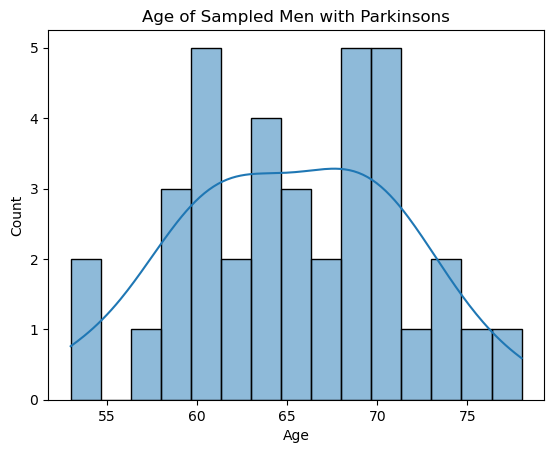

In [483]:
sns.histplot(park_male_df['Age'], bins=15, kde=True)
plt.title('Age of Sampled Men with Parkinsons')
plt.show()

In [481]:
bacteria_park_male_df = park_male_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID'], axis=1)
att_park_male_columns = ['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID']
att_park_male_df = park_male_df[att_park_male_columns]

zero_counts_park_male = (bacteria_park_male_df == 0.0).sum()

threshold_park_male = 0.2 * len(bacteria_park_male_df)

filtered_park_male = zero_counts_park_male[zero_counts_park_male <= threshold_park_male]

filtered_park_male_df = bacteria_park_male_df[filtered_park_male.index]

filtered_park_male = pd.concat([att_park_male_df, filtered_park_male_df], axis=1)

filtered_park_male.to_csv('clean_parkinsons_male.csv')

filtered_park_male.shape

(37, 19)

In [86]:
filtered_park_male.head()

,Run ID,Sex,Age,Country,Mesh ID,Alistipes,Bacteroides,Blautia,Clostridium,Coprococcus,Dorea,Faecalibacterium,Lachnospira,Oscillospira,Parabacteroides,Ruminococcus,Subdoligranulum,Sutterella,Unknown
0,ERR365909,Male,61,Finland,D010300,0.429130,7.95153,0.441752,1.161180,0.416509,0.403887,5.654420,1.438850,4.65733,0.946611,5.28840,6.10880,0.000000,90.3698
1,ERR365910,Male,53,Finland,D010300,0.489687,11.36670,0.000000,2.003260,1.290990,0.638077,5.089780,3.502000,3.93233,0.415492,4.76332,4.34783,0.830984,109.3040
2,ERR365912,Male,66,Finland,D010300,1.345530,30.63360,2.429780,0.966688,0.091443,2.077070,9.627690,1.685170,5.55193,0.431091,5.29066,10.52910,2.259960,21.5545
3,ERR365914,Male,63,Finland,D010300,0.191301,13.66290,0.402739,1.711640,0.000000,0.332259,4.450260,6.141760,3.03061,1.006850,3.27225,4.19855,2.486910,111.7200
4,ERR365915,Male,72,Finland,D010300,0.718898,43.93810,0.121847,4.362130,1.291580,0.255879,0.962593,0.718898,1.76678,3.204580,4.30121,1.63275,1.657120,49.4212


### Parkinsons Female ###

In [74]:
park_female_df = pd.read_csv('parkinsons_female.csv')
park_female_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Acidaminococcus,Acidovorax,Actinomyces,Adlercreutzia,...,Streptococcus,Subdoligranulum,Succinatimonas,Succiniclasticum,Sutterella,Turicibacter,Unknown,Varibaculum,Veillonella,Victivallis
0,ERR365911,Female,NaN,73,Finland,D010300,0.0,0.0,0.0,0.000000,...,0.065172,1.61627,0.0,0.0,2.86757,0.000000,65.0156,0.0,0.755996,0.208551
1,ERR365913,Female,NaN,64,Finland,D010300,0.0,0.0,0.0,0.000000,...,0.167344,4.09993,0.0,0.0,0.00000,0.000000,95.6969,0.0,0.000000,0.000000
2,ERR365918,Female,NaN,73,Finland,D010300,0.0,0.0,0.0,0.000000,...,0.091408,3.40820,0.0,0.0,1.37112,0.287281,72.6822,0.0,0.000000,0.000000
3,ERR365919,Female,NaN,64,Finland,D010300,0.0,0.0,0.0,0.031803,...,0.879890,8.89431,0.0,0.0,0.00000,0.000000,55.8465,0.0,0.000000,0.000000
4,ERR365921,Female,NaN,66,Finland,D010300,0.0,0.0,0.0,0.000000,...,0.871460,5.73711,0.0,0.0,0.43573,0.000000,39.5062,0.0,0.363108,0.000000


In [75]:
park_female_df.isnull().sum()

Run ID           0
Sex              0
BMI             37
Age              0
Country          0
                ..
Turicibacter     0
Unknown          0
Varibaculum      0
Veillonella      0
Victivallis      0
Length: 72, dtype: int64

In [76]:
len(park_female_df)

37

In [77]:
park_female_df.drop('BMI', axis=1, inplace=True)

In [82]:
park_female_df.head()

,Run ID,Sex,Age,Country,Mesh ID,Acidaminococcus,Acidovorax,Actinomyces,Adlercreutzia,Akkermansia,...,Streptococcus,Subdoligranulum,Succinatimonas,Succiniclasticum,Sutterella,Turicibacter,Unknown,Varibaculum,Veillonella,Victivallis
0,ERR365911,Female,73,Finland,D010300,0.0,0.0,0.0,0.000000,0.000000,...,0.065172,1.61627,0.0,0.0,2.86757,0.000000,65.0156,0.0,0.755996,0.208551
1,ERR365913,Female,64,Finland,D010300,0.0,0.0,0.0,0.000000,0.310782,...,0.167344,4.09993,0.0,0.0,0.00000,0.000000,95.6969,0.0,0.000000,0.000000
2,ERR365918,Female,73,Finland,D010300,0.0,0.0,0.0,0.000000,0.000000,...,0.091408,3.40820,0.0,0.0,1.37112,0.287281,72.6822,0.0,0.000000,0.000000
3,ERR365919,Female,64,Finland,D010300,0.0,0.0,0.0,0.031803,0.349836,...,0.879890,8.89431,0.0,0.0,0.00000,0.000000,55.8465,0.0,0.000000,0.000000
4,ERR365921,Female,66,Finland,D010300,0.0,0.0,0.0,0.000000,0.058097,...,0.871460,5.73711,0.0,0.0,0.43573,0.000000,39.5062,0.0,0.363108,0.000000


In [485]:
park_female_df['Age'].unique()

array([73, 64, 66, 67, 69, 56, 65, 60, 75, 61, 72, 68, 55, 62, 54])

In [486]:
park_female_df['Country'].unique()

array(['Finland'], dtype=object)

In [487]:
bacteria_park_female_df = park_female_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID'], axis=1)
att_park_female_columns = ['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID']
att_park_female_df = park_female_df[att_park_female_columns]

zero_counts_park_female = (bacteria_park_female_df == 0.0).sum()

threshold_park_female = 0.2 * len(bacteria_park_female_df)

filtered_park_female = zero_counts_park_female[zero_counts_park_female <= threshold_park_female]

filtered_park_female_df = bacteria_park_female_df[filtered_park_female.index]

filtered_park_female = pd.concat([att_park_female_df, filtered_park_female_df], axis=1)

filtered_park_female.to_csv('clean_parkinsons_female.csv')

filtered_park_female.shape

(37, 20)

In [84]:
filtered_park_female.head()

,Run ID,Sex,Age,Country,Mesh ID,Alistipes,Anaerostipes,Bacteroides,Blautia,Clostridium,Coprococcus,Dorea,Faecalibacterium,Lachnospira,Oscillospira,Parabacteroides,Ruminococcus,Subdoligranulum,Sutterella,Unknown
0,ERR365911,Female,73,Finland,D010300,3.349840,0.625652,28.36290,0.091241,0.00000,0.130344,0.364964,1.029720,0.091241,6.24348,4.053700,8.66788,1.61627,2.86757,65.0156
1,ERR365913,Female,64,Finland,D010300,0.095625,0.083672,7.75759,1.016020,3.50227,0.000000,0.000000,0.394454,0.382501,5.67774,15.790100,5.68970,4.09993,0.00000,95.6969
2,ERR365918,Female,73,Finland,D010300,0.208932,0.352572,13.28020,2.415770,1.94568,0.117524,3.042570,6.685820,3.786890,6.26796,0.378689,8.33116,3.40820,1.37112,72.6822
3,ERR365919,Female,64,Finland,D010300,4.600870,0.296830,13.90860,1.060110,1.06011,1.696170,0.614863,3.795190,3.720980,10.24060,3.031910,13.80260,8.89431,0.00000,55.8465
4,ERR365921,Female,66,Finland,D010300,0.726216,0.319535,28.35150,3.311550,4.11038,0.610022,0.610022,15.802500,3.006540,2.16412,4.037760,2.64343,5.73711,0.43573,39.5062


### Alzheimers Male

In [126]:
alz_male_df = pd.read_csv('alzheimers_male.csv')
alz_male_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acholeplasma,Acidaminococcus,...,Thermoanaerobacter,Truepera,Tyzzerella,Uliginosibacterium,Unknown,Veillonella,Victivallis,Virgibacillus,Weissella,Yersinia
0,ERR1090510,Male,30.11,31,United States of America,['D000544'],0.0,0.008079,0.000000,0.937222,...,0.000000,0.000000,0.339339,0.032318,18.9626,0.000000,0.000000,0.000000,0.0,0.000000
1,ERR1843463,Male,24.41,0,United States of America,"['D000544', 'D001327']",0.0,0.000000,0.000000,0.036957,...,0.000000,0.000000,0.000000,0.000000,42.9544,0.026398,0.042236,0.015839,0.0,0.000000
2,ERR1844528,Male,24.41,0,United States of America,"['D000544', 'D001327']",0.0,0.000000,0.000000,0.027337,...,0.000000,0.005467,0.000000,0.000000,42.1542,0.049207,0.027337,0.000000,0.0,0.005467
3,ERR2091834,Male,23.72,56,United Kingdom,['D000544'],0.0,0.000000,0.078935,0.036836,...,0.010525,0.000000,0.005262,0.000000,11.7560,0.000000,0.000000,0.000000,0.0,0.000000
4,SRR9671458,Male,NaN,64,China,['D000544'],0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,183.0010,0.000000,0.000000,0.000000,0.0,0.000000


In [127]:
alz_male_df.isnull().sum()

Run ID            0
Sex               0
BMI              23
Age               0
Country           0
                 ..
Veillonella       0
Victivallis       0
Virgibacillus     0
Weissella         0
Yersinia          0
Length: 170, dtype: int64

In [128]:
alz_male_df.shape

(27, 170)

In [129]:
# dropping the BMI column because there are only 4 entries 
alz_male_df.drop('BMI', axis=1, inplace=True)

In [130]:
alz_male_df.head()

,Run ID,Sex,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acholeplasma,Acidaminococcus,Acinetobacter,...,Thermoanaerobacter,Truepera,Tyzzerella,Uliginosibacterium,Unknown,Veillonella,Victivallis,Virgibacillus,Weissella,Yersinia
0,ERR1090510,Male,31,United States of America,['D000544'],0.0,0.008079,0.000000,0.937222,0.016159,...,0.000000,0.000000,0.339339,0.032318,18.9626,0.000000,0.000000,0.000000,0.0,0.000000
1,ERR1843463,Male,0,United States of America,"['D000544', 'D001327']",0.0,0.000000,0.000000,0.036957,0.000000,...,0.000000,0.000000,0.000000,0.000000,42.9544,0.026398,0.042236,0.015839,0.0,0.000000
2,ERR1844528,Male,0,United States of America,"['D000544', 'D001327']",0.0,0.000000,0.000000,0.027337,0.005467,...,0.000000,0.005467,0.000000,0.000000,42.1542,0.049207,0.027337,0.000000,0.0,0.005467
3,ERR2091834,Male,56,United Kingdom,['D000544'],0.0,0.000000,0.078935,0.036836,0.000000,...,0.010525,0.000000,0.005262,0.000000,11.7560,0.000000,0.000000,0.000000,0.0,0.000000
4,SRR9671458,Male,64,China,['D000544'],0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,183.0010,0.000000,0.000000,0.000000,0.0,0.000000


In [131]:
alz_male_df['Age'].unique()

array([31,  0, 56, 64, 82, 81, 72, 62, 75, 61, 60, 78, 69, 85, 71, 59, 63,
       65])

In [165]:
# 31 year old with alzheimers ?? could be a mistake or early-onset 
# going to replace 0 with the median of the ages, not including the 0 or 31 

alz_male_age_filter = alz_male_df[alz_male_df['Age'] > 35]
alz_male_age_median = alz_male_age_filter['Age'].median()
alz_male_df['Age'] = alz_male_df['Age'].replace(0, alz_male_age_median)
# not replacing the 31 at this point

alz_male_df.head()

,Run ID,Sex,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acholeplasma,Acidaminococcus,Acinetobacter,...,Thermoanaerobacter,Truepera,Tyzzerella,Uliginosibacterium,Unknown,Veillonella,Victivallis,Virgibacillus,Weissella,Yersinia
0,ERR1090510,Male,31,United States of America,['D000544'],0.0,0.008079,0.000000,0.937222,0.016159,...,0.000000,0.000000,0.339339,0.032318,18.9626,0.000000,0.000000,0.000000,0.0,0.000000
1,ERR1843463,Male,70,United States of America,"['D000544', 'D001327']",0.0,0.000000,0.000000,0.036957,0.000000,...,0.000000,0.000000,0.000000,0.000000,42.9544,0.026398,0.042236,0.015839,0.0,0.000000
2,ERR1844528,Male,70,United States of America,"['D000544', 'D001327']",0.0,0.000000,0.000000,0.027337,0.005467,...,0.000000,0.005467,0.000000,0.000000,42.1542,0.049207,0.027337,0.000000,0.0,0.005467
3,ERR2091834,Male,56,United Kingdom,['D000544'],0.0,0.000000,0.078935,0.036836,0.000000,...,0.010525,0.000000,0.005262,0.000000,11.7560,0.000000,0.000000,0.000000,0.0,0.000000
4,SRR9671458,Male,64,China,['D000544'],0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,183.0010,0.000000,0.000000,0.000000,0.0,0.000000


In [488]:
alz_male_df['Country'].unique()

array(['United States of America', 'United Kingdom', 'China'],
      dtype=object)

In [133]:
mesh_id_alz_male_df = alz_male_df['Mesh ID'].unique()
mesh_id_alz_male_df
# adding these to the dictionary up top

array(["['D000544']", "['D000544', 'D001327']"], dtype=object)

In [152]:
mapped_diseases_alz_male = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in mesh_id_alz_male_df
]

print(mapped_diseases_alz_male)

[['Alzheimers'], ['Alzheimers', 'Autoimmune Diseases']]


In [489]:
bacteria_alz_male_df = alz_male_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID'], axis=1)
att_alz_male_columns = ['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID']
att_alz_male_df = alz_male_df[att_alz_male_columns]

zero_counts_alz_male = (bacteria_alz_male_df == 0.0).sum()

threshold_alz_male = 0.2 * len(bacteria_alz_male_df)

filtered_alz_male = zero_counts_alz_male[zero_counts_alz_male <= threshold_alz_male]

filtered_alz_male_df = bacteria_alz_male_df[filtered_alz_male.index]

filtered_alz_male = pd.concat([att_alz_male_df, filtered_alz_male_df], axis=1)

filtered_alz_male.to_csv('clean_alzheimers_male.csv')

filtered_alz_male.shape

(27, 13)

In [136]:
filtered_alz_male.head()

,Run ID,Sex,Age,Country,Mesh ID,Bacteroides,Clostridium,Dorea,Faecalibacterium,Roseburia,Ruminococcus,Streptococcus,Unknown
0,ERR1090510,Male,31,United States of America,['D000544'],33.489500,0.105034,0.000000,0.008079,0.048477,0.242385,0.016159,18.9626
1,ERR1843463,Male,70,United States of America,"['D000544', 'D001327']",32.812400,0.005280,0.021118,4.070530,0.221741,0.105591,0.337891,42.9544
2,ERR1844528,Male,70,United States of America,"['D000544', 'D001327']",33.701500,0.010935,0.010935,3.947510,0.235101,0.114817,0.355385,42.1542
3,ERR2091834,Male,56,United Kingdom,['D000544'],0.373625,0.236805,0.036836,3.194230,0.031574,0.273641,0.010525,11.7560
4,SRR9671458,Male,64,China,['D000544'],0.027799,0.125096,0.000000,0.896518,0.979915,0.576829,0.500382,183.0010


### Alzheimers Female

In [142]:
alz_female_df = pd.read_csv('alzheimers_female.csv')
alz_female_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Acetobacterium,Acholeplasma,Acidaminococcus,Acidihalobacter,...,Treponema,Tyzzerella,Unknown,Varibaculum,Veillonella,Verrucomicrobium,Vibrio,Victivallis,Viridibacillus,Weissella
0,ERR1160800,Female,26.09,53,United States of America,"['D000544', 'D008881']",0.001165,0.009320,0.33086,0.001165,...,0.0,0.001165,40.5105,0.00932,1.00889,0.005825,0.08854,0.00233,0.001165,0.00233
1,ERR2091942,Female,25.07,53,United Kingdom,"['D000544', 'D007410']",0.000000,0.946936,0.00000,0.000000,...,0.0,0.003573,35.6012,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
2,SRR9671487,Female,NaN,67,China,['D000544'],0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,170.0640,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
3,SRR9671488,Female,NaN,80,China,['D000544'],0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,114.2700,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
4,SRR9671489,Female,NaN,57,China,['D000544'],0.000000,0.000000,0.00000,0.000000,...,0.0,0.000000,91.3630,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000


In [143]:
alz_female_df.isnull().sum()

Run ID               0
Sex                  0
BMI                 20
Age                  0
Country              0
                    ..
Verrucomicrobium     0
Vibrio               0
Victivallis          0
Viridibacillus       0
Weissella            0
Length: 278, dtype: int64

In [144]:
len(alz_female_df)

22

In [145]:
# dropping the BMI column because only two samples actually have values 
alz_female_df.drop('BMI', axis=1, inplace=True)

In [150]:
alz_female_df.head()

,Run ID,Sex,Age,Country,Mesh ID,Acetobacterium,Acholeplasma,Acidaminococcus,Acidihalobacter,Acidithiobacillus,...,Treponema,Tyzzerella,Unknown,Varibaculum,Veillonella,Verrucomicrobium,Vibrio,Victivallis,Viridibacillus,Weissella
0,ERR1160800,Female,53,United States of America,"['D000544', 'D008881']",0.001165,0.009320,0.33086,0.001165,0.003495,...,0.0,0.001165,40.5105,0.00932,1.00889,0.005825,0.08854,0.00233,0.001165,0.00233
1,ERR2091942,Female,53,United Kingdom,"['D000544', 'D007410']",0.000000,0.946936,0.00000,0.000000,0.000000,...,0.0,0.003573,35.6012,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
2,SRR9671487,Female,67,China,['D000544'],0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,170.0640,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
3,SRR9671488,Female,80,China,['D000544'],0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,114.2700,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000
4,SRR9671489,Female,57,China,['D000544'],0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.000000,91.3630,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000


In [147]:
alz_female_df['Age'].unique()

array([53, 67, 80, 57, 76, 71, 72, 61, 59, 85, 82, 78, 79, 83])

In [490]:
alz_female_df['Country'].unique()

array(['United States of America', 'United Kingdom', 'China'],
      dtype=object)

In [153]:
mesh_id_alz_female_df = alz_female_df['Mesh ID'].unique()
mesh_id_alz_female_df

array(["['D000544', 'D008881']", "['D000544', 'D007410']", "['D000544']"],
      dtype=object)

In [154]:
mapped_diseases_alz_female = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in mesh_id_alz_female_df
]

print(mapped_diseases_alz_female)

[['Alzheimers', 'Migrane Disorders'], ['Alzheimers', 'Intestinal Diseases'], ['Alzheimers']]


In [491]:
bacteria_alz_female_df = alz_female_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID'], axis=1)
att_alz_female_columns = ['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID']
att_alz_female_df = alz_female_df[att_alz_female_columns]

zero_counts_alz_female = (bacteria_alz_female_df == 0.0).sum()

threshold_alz_female = 0.2 * len(bacteria_alz_female_df)

filtered_alz_female = zero_counts_alz_female[zero_counts_alz_female <= threshold_alz_female]

filtered_alz_female_df = bacteria_alz_female_df[filtered_alz_female.index]

filtered_alz_female = pd.concat([att_alz_female_df, filtered_alz_female_df], axis=1)

filtered_alz_female.to_csv('clean_alzheimers_female.csv')

filtered_alz_female.shape

(22, 13)

In [156]:
filtered_alz_female.head()

,Run ID,Sex,Age,Country,Mesh ID,Bacteroides,Clostridium,Dorea,Faecalibacterium,Roseburia,Ruminococcus,Streptococcus,Unknown
0,ERR1160800,Female,53,United States of America,"['D000544', 'D008881']",0.855109,0.097860,0.040775,9.801140,0.025630,0.445030,4.657670,40.5105
1,ERR2091942,Female,53,United Kingdom,"['D000544', 'D007410']",12.921200,0.321601,0.017867,15.172400,0.078614,0.360908,0.007147,35.6012
2,SRR9671487,Female,67,China,['D000544'],8.114520,1.053260,0.000000,0.000000,0.000000,0.000000,1.646640,170.0640
3,SRR9671488,Female,80,China,['D000544'],9.345410,2.009400,9.733670,0.422315,0.463184,7.969480,3.099240,114.2700
4,SRR9671489,Female,57,China,['D000544'],2.975540,11.233200,0.000000,0.000000,0.000000,0.000000,0.219670,91.3630


### Schizophrenia Male

In [174]:
sch_male_df = pd.read_csv('schizophrenia_male.csv')
sch_male_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetoanaerobium,Acetobacter,...,Weissella,Wenyingzhuangia,Wenzhouxiangella,Wolbachia,Xanthomonas,Xenorhabdus,Yersinia,Youngiibacter,Zoogloea,Zymomonas
0,ERR1072629,Male,17.67,64,United States of America,"['D001714', 'D003863', 'D007410', 'D008171', '...",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00484,0.0
1,ERR1072937,Male,26.51,53,United States of America,"['D001714', 'D002318', 'D003863', 'D012559']",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,ERR1073491,Male,28.08,49,United States of America,"['D001714', 'D003863', 'D012559']",0.003157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,ERR1075554,Male,30.74,62,United States of America,"['D001289', 'D001714', 'D003863', 'D008881', '...",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,ERR1075686,Male,45.84,56,United States of America,"['D001714', 'D003863', 'D008171', 'D012559']",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [175]:
sch_male_df.isnull().sum()

Run ID           0
Sex              0
BMI              0
Age              0
Country          0
                ..
Xenorhabdus      0
Yersinia         0
Youngiibacter    0
Zoogloea         0
Zymomonas        0
Length: 773, dtype: int64

In [176]:
sch_male_df['BMI'].unique()

array([  17.67,   26.51,   28.08,   30.74,   45.84,   20.28,   22.72,
         20.62,   31.47,   27.37,    0.  ,   26.54,   23.49,   21.52,
         22.24,   33.12,   23.18,   25.1 ,   23.99,   22.84,   20.06,
         40.32,   16.98,   31.97,   24.49,   23.75,   22.15,   19.14,
         25.33,   24.41,   25.38,   24.33,   32.14, 4101.24,   21.29,
         19.61,   22.87,   29.99,   25.09,   30.27,   23.59,   26.26,
         29.68,   21.91,   28.09,   24.99,   23.71,   32.92,   20.45,
         24.68,   28.76,   24.48,   20.89,   27.32,   25.21,   20.52,
         33.72,   27.69,   28.35,   27.98,   24.37,   28.75,   22.28,
         23.24,   24.58,   23.06,   45.19,   29.57,   22.05,   33.47,
         21.62,   27.02,   20.8 ,   24.39,   33.91,   28.97,   32.22,
         29.84,   28.12,   25.4 ,   24.8 ,   21.95,   20.97,   25.82,
         29.41])

In [177]:
# replace the BMI's 0 and 4100 with the medians of the rest 

sch_male_bmi_filter = sch_male_df[(sch_male_df['BMI'] > 1) & (sch_male_df['BMI'] < 50)]
sch_male_bmi_median = sch_male_bmi_filter['BMI'].median()
sch_male_df['BMI'] = sch_male_df['BMI'].replace([0, 4101.24], sch_male_bmi_median)

sch_male_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetoanaerobium,Acetobacter,...,Weissella,Wenyingzhuangia,Wenzhouxiangella,Wolbachia,Xanthomonas,Xenorhabdus,Yersinia,Youngiibacter,Zoogloea,Zymomonas
0,ERR1072629,Male,17.67,64,United States of America,"['D001714', 'D003863', 'D007410', 'D008171', '...",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00484,0.0
1,ERR1072937,Male,26.51,53,United States of America,"['D001714', 'D002318', 'D003863', 'D012559']",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,ERR1073491,Male,28.08,49,United States of America,"['D001714', 'D003863', 'D012559']",0.003157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,ERR1075554,Male,30.74,62,United States of America,"['D001289', 'D001714', 'D003863', 'D008881', '...",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,ERR1075686,Male,45.84,56,United States of America,"['D001714', 'D003863', 'D008171', 'D012559']",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [178]:
sch_male_df['BMI'].unique()

array([17.67, 26.51, 28.08, 30.74, 45.84, 20.28, 22.72, 20.62, 31.47,
       27.37, 24.68, 26.54, 23.49, 21.52, 22.24, 33.12, 23.18, 25.1 ,
       23.99, 22.84, 20.06, 40.32, 16.98, 31.97, 24.49, 23.75, 22.15,
       19.14, 25.33, 24.41, 25.38, 24.33, 32.14, 21.29, 19.61, 22.87,
       29.99, 25.09, 30.27, 23.59, 26.26, 29.68, 21.91, 28.09, 24.99,
       23.71, 32.92, 20.45, 28.76, 24.48, 20.89, 27.32, 25.21, 20.52,
       33.72, 27.69, 28.35, 27.98, 24.37, 28.75, 22.28, 23.24, 24.58,
       23.06, 45.19, 29.57, 22.05, 33.47, 21.62, 27.02, 20.8 , 24.39,
       33.91, 28.97, 32.22, 29.84, 28.12, 25.4 , 24.8 , 21.95, 20.97,
       25.82, 29.41])

In [179]:
sch_male_df['Age'].unique()

array([64, 53, 49, 62, 56, 39, 67, 73,  0, 71, 54, 23, 40, 35, 38, 42, 43,
       21, 61, 34, 72, 27, 32, 25, 24, 65, 47, 51, 63, 46, 52, 45, 68, 48,
       57, 70, 29, 58, 37, 36, 41, 28, 50, 17, 31, 55, 30, 12, 76])

In [183]:
# replace 0 with the median 

sch_male_age_filter = sch_male_df[sch_male_df['Age'] > 1]
sch_male_age_median = sch_male_age_filter['Age'].median()
sch_male_df['Age'] = sch_male_df['Age'].replace(0, sch_male_age_median)

sch_male_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetoanaerobium,Acetobacter,...,Weissella,Wenyingzhuangia,Wenzhouxiangella,Wolbachia,Xanthomonas,Xenorhabdus,Yersinia,Youngiibacter,Zoogloea,Zymomonas
0,ERR1072629,Male,17.67,64,United States of America,"['D001714', 'D003863', 'D007410', 'D008171', '...",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00484,0.0
1,ERR1072937,Male,26.51,53,United States of America,"['D001714', 'D002318', 'D003863', 'D012559']",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,ERR1073491,Male,28.08,49,United States of America,"['D001714', 'D003863', 'D012559']",0.003157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,ERR1075554,Male,30.74,62,United States of America,"['D001289', 'D001714', 'D003863', 'D008881', '...",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,ERR1075686,Male,45.84,56,United States of America,"['D001714', 'D003863', 'D008171', 'D012559']",0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [184]:
sch_male_df['Age'].unique()

array([64, 53, 49, 62, 56, 39, 67, 73, 48, 71, 54, 23, 40, 35, 38, 42, 43,
       21, 61, 34, 72, 27, 32, 25, 24, 65, 47, 51, 63, 46, 52, 45, 68, 57,
       70, 29, 58, 37, 36, 41, 28, 50, 17, 31, 55, 30, 12, 76])

In [324]:
sch_male_df['Country'].unique()

array(['United States of America', 'United Kingdom', 'Australia',
       'Sweden', 'Canada', 'New Zealand'], dtype=object)

In [186]:
mesh_id_sch_male_df = sch_male_df['Mesh ID'].unique()

In [197]:
mesh_ids_series_sch_male = pd.Series(sch_male_df['Mesh ID'])
flattened_mesh_ids_sch_male = [item for sublist in mesh_ids_series_sch_male.apply(ast.literal_eval) for item in sublist]
unique_mesh_ids_sch_male = pd.Series(flattened_mesh_ids_sch_male).unique()
unique_mesh_ids_sch_male


array(['D001714', 'D003863', 'D007410', 'D008171', 'D012559', 'D013959',
       'D043183', 'D002318', 'D001289', 'D008881', 'D003248', 'D002446',
       'D003920', 'D003967', 'D008107', 'D001327', 'D015212', 'D007674',
       'D003015', 'D000067877', 'D004827', 'D010661'], dtype=object)

In [198]:
mapped_diseases_sch_male = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in unique_mesh_ids_sch_male
]

print(mapped_diseases_sch_male)

[['Bipolar Disorder'], ['Depression'], ['Intestinal Diseases'], ['Lung Diseases'], ['Schizophrenia'], ['Thyroid Diseases'], ['Irritable Bowel Syndrome'], ['Cardiovascular Diseases'], ['Attention Deficit Disorder with Hyperactivity'], ['Migrane Disorders'], ['Constipation'], ['Celiac Disease'], ['Diabetes Mellitus'], ['Diarrhea'], ['Liver Diseases'], ['Autoimmune Diseases'], ['Inflammatory Bowel Diseases'], ['Kidney Diseases'], ['Clostridium Infections'], ['Autism Spectrum Disorder'], ['Epilepsy'], ['Phenylketonurias']]


In [492]:
bacteria_sch_male_df = sch_male_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID'], axis=1)
att_sch_male_columns = ['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID']
att_sch_male_df = sch_male_df[att_sch_male_columns]

zero_counts_sch_male = (bacteria_sch_male_df == 0.0).sum()

threshold_sch_male = 0.2 * len(bacteria_sch_male_df)

filtered_sch_male = zero_counts_sch_male[zero_counts_sch_male <= threshold_sch_male]

filtered_sch_male_df = bacteria_sch_male_df[filtered_sch_male.index]

filtered_sch_male = pd.concat([att_sch_male_df, filtered_sch_male_df], axis=1)

filtered_sch_male.to_csv('clean_schizophrenia_male.csv')

filtered_sch_male.shape

(100, 37)

In [326]:
filtered_sch_male.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Akkermansia,Alistipes,Anaerofilum,Anaerotruncus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1072629,Male,17.670000,64,United States of America,"['D001714', 'D003863', 'D007410', 'D008171', '...",2.158450,17.504700,0.033877,0.159706,...,1.408310,1.974540,11.494000,0.029037,0.024198,0.503315,1.456710,0.198422,0.004840,21.981300
1,ERR1072937,Male,26.510000,53,United States of America,"['D001714', 'D002318', 'D003863', 'D012559']",0.031791,1.017330,0.005299,0.105971,...,0.243734,0.927251,0.222540,0.052986,41.169900,0.090076,0.021194,0.111270,0.598739,10.173300
2,ERR1073491,Male,28.080000,49,United States of America,"['D001714', 'D003863', 'D012559']",0.176768,5.602900,0.025253,0.126263,...,2.077020,0.656566,3.936240,0.022096,0.018939,0.407197,6.177400,0.085227,0.050505,11.057400
3,ERR1075554,Male,30.740000,62,United States of America,"['D001289', 'D001714', 'D003863', 'D008881', '...",0.360811,3.155260,0.044181,0.191451,...,0.250359,2.032330,0.025772,0.147270,0.003682,1.395380,0.209860,0.224587,0.206178,25.967400
4,ERR1075686,Male,45.840000,56,United States of America,"['D001714', 'D003863', 'D008171', 'D012559']",0.037344,4.910690,0.012448,1.163880,...,0.485467,0.553930,1.350590,0.024896,1.674240,0.149374,1.275910,0.908695,0.037344,55.305900


### Schizophrenia Female

In [254]:
sch_female_df = pd.read_csv('schizophrenia_female.csv')
sch_female_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetivibrio,Acetoanaerobium,...,Williamsia,Wolbachia,Xanthomonas,Xenococcus,Xenorhabdus,Yersinia,Yokenella,Youngiibacter,Zoogloea,Zymomonas
0,ERR1073023,Female,34.720000,35,United States of America,"['D001714', 'D003863', 'D012559']",0.000000,0.005583,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ERR1073394,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ERR1073395,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002470,0.000000
3,ERR1073490,Female,25.730000,37,United States of America,"['D001714', 'D003863', 'D012559']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ERR1073812,Female,29.710000,55,United States of America,"['D001289', 'D001714', 'D003015', 'D003863', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [255]:
sch_female_df.isnull().sum()

Run ID           0
Sex              0
BMI              0
Age              0
Country          1
                ..
Yersinia         0
Yokenella        0
Youngiibacter    0
Zoogloea         0
Zymomonas        0
Length: 930, dtype: int64

In [256]:
sch_female_df['Country'].unique()

array(['United States of America', 'Australia', 'United Kingdom',
       'Canada', 'New Zealand', 'Switzerland', nan, 'Norway', 'Ireland'],
      dtype=object)

In [257]:
sch_female_df[sch_female_df['Country'].isna()]

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetivibrio,Acetoanaerobium,...,Williamsia,Wolbachia,Xanthomonas,Xenococcus,Xenorhabdus,Yersinia,Yokenella,Youngiibacter,Zoogloea,Zymomonas
176,ERR1160486,Female,39.200000,40,NaN,"['D001714', 'D003863', 'D012559', 'D043183']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000916,0.000000,0.000000,0.000000,0.000000


In [258]:
sch_female_df['Age'].describe()
# looks like a normal range

count   249.000000
mean     46.839357
std      13.547047
min      13.000000
25%      36.000000
50%      47.000000
75%      58.000000
max      72.000000
Name: Age, dtype: float64

In [259]:
# sch_female_df['BMI'].unique() produces a long list of results with a couple numbers that don't make sense, 
# including 2000 and 4 
# since the ages range from 13-72, a normal bmi should be above 15
# so, i will replace the BMI's outside of this range with the median of the rest of the group

sch_female_df['BMI'].describe()

count    249.000000
mean      36.558072
std      173.190305
min        1.540000
25%       21.790000
50%       24.300000
75%       28.360000
max     2756.040000
Name: BMI, dtype: float64

In [260]:
sch_female_bmi_filter = sch_female_df[(sch_female_df['BMI'] > 15) & (sch_female_df['BMI'] < 50)]
sch_female_bmi_median = sch_female_bmi_filter['BMI'].median()
sch_female_df['BMI'] = sch_female_df['BMI'].apply(lambda x: sch_female_bmi_median if x <= 15 or x >= 50 else x)

sch_female_df['BMI'].describe()

count   249.000000
mean     25.551466
std       5.652129
min      15.180000
25%      21.890000
50%      24.315000
75%      28.320000
max      48.420000
Name: BMI, dtype: float64

In [261]:
# i could drop this row from the dataframe 
# or i can find the average bmi's of women from each country and assign this person the country that fits 
# the problem with that is that it may not be accurate 
# but by deleting the column, i'm losing part of my sample size 
# i'll try replacing it first and see if i need to change it later on 

sch_female_bmi_us = sch_female_df[sch_female_df['Country'] == 'United States of America']['BMI'].describe()
sch_female_bmi_aus = sch_female_df[sch_female_df['Country'] == 'Australia']['BMI'].describe()
sch_female_bmi_uk = sch_female_df[sch_female_df['Country'] == 'United Kingdom']['BMI'].describe()
sch_female_bmi_can = sch_female_df[sch_female_df['Country'] == 'Canada']['BMI'].describe()
sch_female_bmi_nz = sch_female_df[sch_female_df['Country'] == 'New Zealand']['BMI'].describe()
sch_female_bmi_sw = sch_female_df[sch_female_df['Country'] == 'Switzerland']['BMI'].describe()
sch_female_bmi_nor = sch_female_df[sch_female_df['Country'] == 'Norway']['BMI'].describe()
sch_female_bmi_ir = sch_female_df[sch_female_df['Country'] == 'Ireland']['BMI'].describe()

#could have used a for loop

#print(sch_female_bmi_us, sch_female_bmi_aus, sch_female_bmi_uk, sch_female_bmi_can, sch_female_bmi_nz, 
#     sch_female_bmi_sw, sch_female_bmi_nor, sch_female_bmi_ir)

# this method indicates that the woman without a country designation could realistically be apart of the US
# or the UK 
# i'm deciding to drop this row since it's hard to tell

In [262]:
sch_female_df.dropna(subset=['Country'], inplace=True)

In [263]:
sch_female_df.shape
# confirmed one less row than the original sch_female_df

(248, 930)

In [264]:
mesh_ids_series_sch_female = pd.Series(sch_female_df['Mesh ID'])
flattened_mesh_ids_sch_female = [item for sublist in mesh_ids_series_sch_female.apply(ast.literal_eval) for item in sublist]
unique_mesh_ids_sch_female = pd.Series(flattened_mesh_ids_sch_female).unique()
unique_mesh_ids_sch_female


array(['D001714', 'D003863', 'D012559', 'D001327', 'D003920', 'D003967',
       'D013959', 'D001289', 'D003015', 'D004827', 'D007410', 'D008171',
       'D003248', 'D015212', 'D043183', 'D008107', 'D008881', 'D002318',
       'D007674', 'D002446', 'D000067877'], dtype=object)

In [265]:
mapped_diseases_sch_female = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in unique_mesh_ids_sch_female
]

print(mapped_diseases_sch_female)

[['Bipolar Disorder'], ['Depression'], ['Schizophrenia'], ['Autoimmune Diseases'], ['Diabetes Mellitus'], ['Diarrhea'], ['Thyroid Diseases'], ['Attention Deficit Disorder with Hyperactivity'], ['Clostridium Infections'], ['Epilepsy'], ['Intestinal Diseases'], ['Lung Diseases'], ['Constipation'], ['Inflammatory Bowel Diseases'], ['Irritable Bowel Syndrome'], ['Liver Diseases'], ['Migrane Disorders'], ['Cardiovascular Diseases'], ['Kidney Diseases'], ['Celiac Disease'], ['Autism Spectrum Disorder']]


In [493]:
bacteria_sch_female_df = sch_female_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID'], axis=1)
att_sch_female_columns = ['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID']
att_sch_female_df = sch_female_df[att_sch_female_columns]

zero_counts_sch_female = (bacteria_sch_female_df == 0.0).sum()

threshold_sch_female = 0.2 * len(bacteria_sch_female_df)

filtered_sch_female = zero_counts_sch_female[zero_counts_sch_female <= threshold_sch_female]

filtered_sch_female_df = bacteria_sch_female_df[filtered_sch_female.index]

filtered_sch_female = pd.concat([att_sch_female_df, filtered_sch_female_df], axis=1)

filtered_sch_female.to_csv('clean_schizophrenia_female.csv')

filtered_sch_female.shape

(248, 36)

In [328]:
filtered_sch_female.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Akkermansia,Alistipes,Anaerotruncus,Bacillus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1073023,Female,34.720000,35,United States of America,"['D001714', 'D003863', 'D012559']",0.005583,3.416700,0.904422,3.612100,...,0.022331,0.614113,3.818670,0.027914,0.005583,1.747430,1.574360,0.217731,0.206565,28.210100
1,ERR1073394,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.005104,6.116980,0.053591,0.030623,...,0.604808,1.253000,1.819530,0.117389,0.005104,1.436740,0.247537,0.010208,0.010208,3.815140
2,ERR1073395,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.002470,6.746870,0.069173,0.027175,...,0.140817,1.339000,1.647810,0.027175,0.012352,2.030730,0.303869,0.002470,0.019764,4.923660
3,ERR1073490,Female,25.730000,37,United States of America,"['D001714', 'D003863', 'D012559']",0.331675,3.571880,0.290216,0.041459,...,0.424161,2.611940,2.092100,0.031892,0.328486,0.711188,0.373134,0.105243,0.054216,36.506600
4,ERR1073812,Female,29.710000,55,United States of America,"['D001289', 'D001714', 'D003015', 'D003863', '...",0.005280,3.120220,0.068634,0.021118,...,0.211182,0.628267,0.950319,2.418040,0.047516,0.158387,0.021118,0.036957,0.047516,59.099300


### Bipolar Male

In [310]:
bi_male_df = pd.read_csv('bipolar_male.csv')
bi_male_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetivibrio,Acetoanaerobium,...,Weissella,Wenyingzhuangia,Wenzhouxiangella,Wolbachia,Xanthomonas,Xenorhabdus,Yersinia,Youngiibacter,Zoogloea,Zymomonas
0,ERR1072629,Male,17.670000,64,United States of America,"['D001714', 'D003863', 'D007410', 'D008171', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004840,0.000000
1,ERR1072937,Male,26.510000,53,United States of America,"['D001714', 'D002318', 'D003863', 'D012559']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ERR1073491,Male,28.080000,49,United States of America,"['D001714', 'D003863', 'D012559']",0.003157,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ERR1075554,Male,30.740000,62,United States of America,"['D001289', 'D001714', 'D003863', 'D008881', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ERR1075686,Male,45.840000,56,United States of America,"['D001714', 'D003863', 'D008171', 'D012559']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [311]:
bi_male_df.isnull().sum()

Run ID           0
Sex              0
BMI              0
Age              0
Country          0
                ..
Xenorhabdus      0
Yersinia         0
Youngiibacter    0
Zoogloea         0
Zymomonas        0
Length: 783, dtype: int64

In [312]:
bi_male_df['BMI'].unique()
# need to replace the 0 and 4101.24 with the median of the rest

array([  17.67,   26.51,   28.08,   30.74,   45.84,   20.28,   22.72,
         20.62,   31.47,   27.37,    0.  ,   26.54,   23.49,   21.52,
         22.24,   33.12,   23.18,   25.1 ,   23.99,   22.84,   20.06,
         40.32,   16.98,   31.97,   24.49,   23.75,   22.15,   19.14,
         25.33,   24.41,   25.38,   24.33,   32.14, 4101.24,   21.29,
         19.61,   22.87,   29.99,   25.09,   30.27,   23.59,   26.26,
         29.68,   21.91,   28.09,   24.99,   23.71,   32.92,   20.45,
         24.68,   28.76,   24.48,   20.89,   27.32,   25.21,   20.52,
         33.72,   27.69,   28.35,   27.98,   24.37,   28.75,   22.28,
         23.24,   24.58,   23.06,   45.19,   29.57,   22.05,   33.47,
         21.62,   27.02,   20.8 ,   24.39,   33.91,   28.97,   32.22,
         29.84,   28.12,   25.4 ,   24.8 ,   21.95,   20.97,   25.82,
         29.41,   27.95,   28.24,   25.06,   25.42,   28.3 ,   22.64,
         25.84,   44.72,   32.28,   31.32,   27.45,   24.65,   38.03,
         36.41,   21

In [313]:
bi_male_bmi_filter = bi_male_df[(bi_male_df['BMI'] > 1) & (bi_male_df['BMI'] < 50)]
bi_male_bmi_median = bi_male_bmi_filter['BMI'].median()
bi_male_df['BMI'] = bi_male_df['BMI'].replace([0, 4101.24], bi_male_bmi_median)

bi_male_df['BMI'].unique()

array([17.67, 26.51, 28.08, 30.74, 45.84, 20.28, 22.72, 20.62, 31.47,
       27.37, 25.27, 26.54, 23.49, 21.52, 22.24, 33.12, 23.18, 25.1 ,
       23.99, 22.84, 20.06, 40.32, 16.98, 31.97, 24.49, 23.75, 22.15,
       19.14, 25.33, 24.41, 25.38, 24.33, 32.14, 21.29, 19.61, 22.87,
       29.99, 25.09, 30.27, 23.59, 26.26, 29.68, 21.91, 28.09, 24.99,
       23.71, 32.92, 20.45, 24.68, 28.76, 24.48, 20.89, 27.32, 25.21,
       20.52, 33.72, 27.69, 28.35, 27.98, 24.37, 28.75, 22.28, 23.24,
       24.58, 23.06, 45.19, 29.57, 22.05, 33.47, 21.62, 27.02, 20.8 ,
       24.39, 33.91, 28.97, 32.22, 29.84, 28.12, 25.4 , 24.8 , 21.95,
       20.97, 25.82, 29.41, 27.95, 28.24, 25.06, 25.42, 28.3 , 22.64,
       25.84, 44.72, 32.28, 31.32, 27.45, 24.65, 38.03, 36.41, 21.22,
       28.5 , 25.8 , 32.48, 31.26, 24.  ])

In [314]:
bi_male_df['Age'].unique()
# replace 0 with the median of the rest 

array([64, 53, 49, 62, 56, 39, 67, 73,  0, 71, 54, 23, 40, 35, 38, 42, 43,
       21, 61, 34, 72, 27, 32, 25, 24, 65, 47, 51, 63, 46, 52, 45, 68, 48,
       57, 70, 29, 58, 37, 36, 41, 28, 50, 17, 31, 55, 30, 12, 76, 60, 59,
       87, 74])

In [315]:
bi_male_age_filter = bi_male_df[(bi_male_df['Age'] > 1)]
bi_male_age_median = bi_male_age_filter['Age'].median()
bi_male_df['Age'] = bi_male_df['Age'].replace(0, bi_male_age_median)

bi_male_df['Age'].nunique()

52

In [316]:
bi_male_df['Country'].unique()

array(['United States of America', 'United Kingdom', 'Australia',
       'Sweden', 'Canada', 'New Zealand'], dtype=object)

In [317]:
mesh_ids_series_bi_male = pd.Series(bi_male_df['Mesh ID'])
flattened_mesh_ids_bi_male = [item for sublist in mesh_ids_series_bi_male.apply(ast.literal_eval) for item in sublist]
unique_mesh_ids_bi_male = pd.Series(flattened_mesh_ids_bi_male).unique()
unique_mesh_ids_bi_male


array(['D001714', 'D003863', 'D007410', 'D008171', 'D012559', 'D013959',
       'D043183', 'D002318', 'D001289', 'D008881', 'D003248', 'D002446',
       'D003920', 'D003967', 'D008107', 'D001327', 'D015212', 'D007674',
       'D003015', 'D000067877', 'D004827', 'D010661'], dtype=object)

In [318]:
mapped_diseases_bi_male = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in unique_mesh_ids_bi_male
]

print(mapped_diseases_bi_male)

[['Bipolar Disorder'], ['Depression'], ['Intestinal Diseases'], ['Lung Diseases'], ['Schizophrenia'], ['Thyroid Diseases'], ['Irritable Bowel Syndrome'], ['Cardiovascular Diseases'], ['Attention Deficit Disorder with Hyperactivity'], ['Migrane Disorders'], ['Constipation'], ['Celiac Disease'], ['Diabetes Mellitus'], ['Diarrhea'], ['Liver Diseases'], ['Autoimmune Diseases'], ['Inflammatory Bowel Diseases'], ['Kidney Diseases'], ['Clostridium Infections'], ['Autism Spectrum Disorder'], ['Epilepsy'], ['Phenylketonurias']]


In [494]:
bacteria_bi_male_df = bi_male_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID'], axis=1)
att_bi_male_columns = ['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID']
att_bi_male_df = bi_male_df[att_bi_male_columns]

zero_counts_bi_male = (bacteria_bi_male_df == 0.0).sum()

threshold_bi_male = 0.2 * len(bacteria_bi_male_df)

filtered_bi_male = zero_counts_bi_male[zero_counts_bi_male <= threshold_bi_male]

filtered_bi_male_df = bacteria_bi_male_df[filtered_bi_male.index]

filtered_bi_male = pd.concat([att_bi_male_df, filtered_bi_male_df], axis=1)

filtered_bi_male.to_csv('clean_bipolar_male.csv')

filtered_bi_male.shape

(123, 32)

In [323]:
filtered_bi_male.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Akkermansia,Alistipes,Anaerofilum,Anaerotruncus,...,Lachnoclostridium,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1072629,Male,17.670000,64,United States of America,"['D001714', 'D003863', 'D007410', 'D008171', '...",2.158450,17.504700,0.033877,0.159706,...,1.234090,1.408310,1.974540,11.494000,0.029037,0.503315,1.456710,0.198422,0.004840,21.981300
1,ERR1072937,Male,26.510000,53,United States of America,"['D001714', 'D002318', 'D003863', 'D012559']",0.031791,1.017330,0.005299,0.105971,...,0.328512,0.243734,0.927251,0.222540,0.052986,0.090076,0.021194,0.111270,0.598739,10.173300
2,ERR1073491,Male,28.080000,49,United States of America,"['D001714', 'D003863', 'D012559']",0.176768,5.602900,0.025253,0.126263,...,2.607320,2.077020,0.656566,3.936240,0.022096,0.407197,6.177400,0.085227,0.050505,11.057400
3,ERR1075554,Male,30.740000,62,United States of America,"['D001289', 'D001714', 'D003863', 'D008881', '...",0.360811,3.155260,0.044181,0.191451,...,3.416660,0.250359,2.032330,0.025772,0.147270,1.395380,0.209860,0.224587,0.206178,25.967400
4,ERR1075686,Male,45.840000,56,United States of America,"['D001714', 'D003863', 'D008171', 'D012559']",0.037344,4.910690,0.012448,1.163880,...,0.304973,0.485467,0.553930,1.350590,0.024896,0.149374,1.275910,0.908695,0.037344,55.305900


### Bipolar Female

In [329]:
bi_female_df = pd.read_csv('bipolar_female.csv')
bi_female_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetivibrio,Acetoanaerobium,...,Williamsia,Wolbachia,Xanthomonas,Xenococcus,Xenorhabdus,Yersinia,Yokenella,Youngiibacter,Zoogloea,Zymomonas
0,ERR1073023,Female,34.720000,35,United States of America,"['D001714', 'D003863', 'D012559']",0.000000,0.005583,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ERR1073394,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ERR1073395,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002470,0.000000
3,ERR1073490,Female,25.730000,37,United States of America,"['D001714', 'D003863', 'D012559']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ERR1073812,Female,29.710000,55,United States of America,"['D001289', 'D001714', 'D003015', 'D003863', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [330]:
bi_female_df.isnull().sum()

Run ID           0
Sex              0
BMI              0
Age              0
Country          1
                ..
Yersinia         0
Yokenella        0
Youngiibacter    0
Zoogloea         0
Zymomonas        0
Length: 956, dtype: int64

In [331]:
bi_female_df['Country'].unique()

array(['United States of America', 'Australia', 'United Kingdom',
       'Canada', 'New Zealand', 'Switzerland', nan, 'Norway', 'Ireland'],
      dtype=object)

In [333]:
bi_female_df[bi_female_df['Country'].isna()]
# same entry from the sch_female_df and since i already tried and couldn't replace it with accuracy,
# i'm going to drop this row right away

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetivibrio,Acetoanaerobium,...,Williamsia,Wolbachia,Xanthomonas,Xenococcus,Xenorhabdus,Yersinia,Yokenella,Youngiibacter,Zoogloea,Zymomonas
176,ERR1160486,Female,39.200000,40,NaN,"['D001714', 'D003863', 'D012559', 'D043183']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000916,0.000000,0.000000,0.000000,0.000000


In [334]:
bi_female_df.dropna(subset=['Country'], inplace=True)

In [335]:
bi_female_df['Country'].unique()

array(['United States of America', 'Australia', 'United Kingdom',
       'Canada', 'New Zealand', 'Switzerland', 'Norway', 'Ireland'],
      dtype=object)

In [337]:
bi_female_df['Age'].unique()
# doesn't look like anything needs to be changed or replaced

array([35, 27, 37, 55, 28, 47, 41, 57, 67, 36, 53, 56, 43, 48, 60, 44, 45,
       33, 30, 63, 66, 46, 61, 59, 38, 68, 51, 70, 62, 40, 42, 52, 54, 32,
       39, 13, 19, 26, 49, 22, 29, 65, 34, 64, 58, 69, 31, 50, 21, 24, 25,
       20, 72, 71])

In [340]:
bi_female_df['BMI'].describe()
# there are outliers here and since a normal bmi for adults (no one under the age of 18 in the df)
# again going to replace anything less than 15 and greater than 50 for a larger range 

count    316.000000
mean      35.063829
std      153.740943
min        1.540000
25%       21.927500
50%       24.815000
75%       29.665000
max     2756.040000
Name: BMI, dtype: float64

In [341]:
bi_female_bmi_filter = bi_female_df[(bi_female_df['BMI'] > 15) & (bi_female_df['BMI'] < 50)]
bi_female_bmi_median = bi_female_bmi_filter['BMI'].median()
bi_female_df['BMI'] = bi_female_df['BMI'].apply(lambda x: bi_female_bmi_median if x <= 15 or x >= 50 else x)

bi_female_df['BMI'].describe()

count   316.000000
mean     26.309367
std       6.183916
min      15.180000
25%      21.970000
50%      24.815000
75%      29.245000
max      48.420000
Name: BMI, dtype: float64

In [343]:
mesh_ids_series_bi_female = pd.Series(bi_female_df['Mesh ID'])
flattened_mesh_ids_bi_female = [item for sublist in mesh_ids_series_bi_female.apply(ast.literal_eval) for item in sublist]
unique_mesh_ids_bi_female = pd.Series(flattened_mesh_ids_bi_female).unique()
unique_mesh_ids_bi_female


array(['D001714', 'D003863', 'D012559', 'D001327', 'D003920', 'D003967',
       'D013959', 'D001289', 'D003015', 'D004827', 'D007410', 'D008171',
       'D003248', 'D015212', 'D043183', 'D008107', 'D008881', 'D002318',
       'D007674', 'D002446', 'D000067877'], dtype=object)

In [344]:
mapped_diseases_bi_female = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in unique_mesh_ids_bi_female
]

print(mapped_diseases_bi_female)

[['Bipolar Disorder'], ['Depression'], ['Schizophrenia'], ['Autoimmune Diseases'], ['Diabetes Mellitus'], ['Diarrhea'], ['Thyroid Diseases'], ['Attention Deficit Disorder with Hyperactivity'], ['Clostridium Infections'], ['Epilepsy'], ['Intestinal Diseases'], ['Lung Diseases'], ['Constipation'], ['Inflammatory Bowel Diseases'], ['Irritable Bowel Syndrome'], ['Liver Diseases'], ['Migrane Disorders'], ['Cardiovascular Diseases'], ['Kidney Diseases'], ['Celiac Disease'], ['Autism Spectrum Disorder']]


In [495]:
bacteria_bi_female_df = bi_female_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID'], axis=1)
att_bi_female_columns = ['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID']
att_bi_female_df = bi_female_df[att_bi_female_columns]

zero_counts_bi_female = (bacteria_bi_female_df == 0.0).sum()

threshold_bi_female = 0.2 * len(bacteria_bi_female_df)

filtered_bi_female = zero_counts_bi_female[zero_counts_bi_female <= threshold_bi_female]

filtered_bi_female_df = bacteria_bi_female_df[filtered_bi_female.index]

filtered_bi_female = pd.concat([att_bi_female_df, filtered_bi_female_df], axis=1)

filtered_bi_female.to_csv('clean_bipolar_female.csv')

filtered_bi_female.shape

(316, 33)

In [346]:
filtered_bi_female.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Akkermansia,Alistipes,Anaerotruncus,Bacillus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Roseburia,Ruminiclostridium,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1073023,Female,34.720000,35,United States of America,"['D001714', 'D003863', 'D012559']",0.005583,3.416700,0.904422,3.612100,...,0.022331,0.614113,3.818670,0.027914,1.747430,1.110990,1.574360,0.217731,0.206565,28.210100
1,ERR1073394,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.005104,6.116980,0.053591,0.030623,...,0.604808,1.253000,1.819530,0.117389,1.436740,0.165876,0.247537,0.010208,0.010208,3.815140
2,ERR1073395,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.002470,6.746870,0.069173,0.027175,...,0.140817,1.339000,1.647810,0.027175,2.030730,0.185286,0.303869,0.002470,0.019764,4.923660
3,ERR1073490,Female,25.730000,37,United States of America,"['D001714', 'D003863', 'D012559']",0.331675,3.571880,0.290216,0.041459,...,0.424161,2.611940,2.092100,0.031892,0.711188,0.369945,0.373134,0.105243,0.054216,36.506600
4,ERR1073812,Female,29.710000,55,United States of America,"['D001289', 'D001714', 'D003015', 'D003863', '...",0.005280,3.120220,0.068634,0.021118,...,0.211182,0.628267,0.950319,2.418040,0.158387,0.237580,0.021118,0.036957,0.047516,59.099300


### Epilepsy Male

In [347]:
ep_male_df = pd.read_csv('epilepsy_male.csv')
ep_male_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetoanaerobium,Acholeplasma,...,Vibrio,Victivallis,Virgibacillus,Vulgatibacter,Weissella,Xanthomonas,Xenorhabdus,Yersinia,Zoogloea,Zymomonas
0,ERR1072832,Male,24.930000,58,United States of America,['D004827'],0.000000,0.000000,0.003570,0.000000,...,0.000000,0.003570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ERR1076844,Male,21.020000,36,United States of America,"['D003248', 'D004827', 'D008171', 'D013959']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ERR1089831,Male,22.910000,43,United States of America,['D004827'],0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005888,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ERR1089867,Male,15.620000,6,Canada,['D004827'],0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005153,0.000000,0.000000,0.010306,0.000000,0.000000,0.000000,0.000000,0.000000
4,ERR1089868,Male,15.620000,6,Canada,['D004827'],0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [348]:
ep_male_df.isnull().sum()

Run ID         0
Sex            0
BMI            0
Age            0
Country        0
              ..
Xanthomonas    0
Xenorhabdus    0
Yersinia       0
Zoogloea       0
Zymomonas      0
Length: 465, dtype: int64

In [350]:
ep_male_df['BMI'].unique()
# everything here looks to be in a normal range, expecting to see lower numbers since there are a couple 
# six year olds

array([24.93, 21.02, 22.91, 15.62, 23.87, 17.94, 27.46, 14.23, 21.79,
       27.51, 23.63, 30.52, 28.12, 24.68, 24.31, 25.11, 20.8 , 19.22,
       24.44, 21.74, 16.64])

In [351]:
ep_male_df['Age'].unique()

array([58, 36, 43,  6, 63, 70,  9,  8, 27, 77, 31, 54, 61, 34, 69, 17, 65,
        5])

In [352]:
ep_male_df['Country'].unique()

array(['United States of America', 'Canada', 'United Kingdom',
       'Czech Republic'], dtype=object)

In [353]:
mesh_ids_series_ep_male = pd.Series(ep_male_df['Mesh ID'])
flattened_mesh_ids_ep_male = [item for sublist in mesh_ids_series_ep_male.apply(ast.literal_eval) for item in sublist]
unique_mesh_ids_ep_male = pd.Series(flattened_mesh_ids_ep_male).unique()
unique_mesh_ids_ep_male


array(['D004827', 'D003248', 'D008171', 'D013959', 'D003967', 'D008881',
       'D001327', 'D002318', 'D007410', 'D000067877', 'D001289',
       'D008107', 'D007674', 'D001714', 'D003015', 'D003863', 'D012559',
       'D043183'], dtype=object)

In [354]:
mapped_diseases_ep_male = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in unique_mesh_ids_ep_male
]

print(mapped_diseases_ep_male)

[['Epilepsy'], ['Constipation'], ['Lung Diseases'], ['Thyroid Diseases'], ['Diarrhea'], ['Migrane Disorders'], ['Autoimmune Diseases'], ['Cardiovascular Diseases'], ['Intestinal Diseases'], ['Autism Spectrum Disorder'], ['Attention Deficit Disorder with Hyperactivity'], ['Liver Diseases'], ['Kidney Diseases'], ['Bipolar Disorder'], ['Clostridium Infections'], ['Depression'], ['Schizophrenia'], ['Irritable Bowel Syndrome']]


In [496]:
bacteria_ep_male_df = ep_male_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID'], axis=1)
att_ep_male_columns = ['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID']
att_ep_male_df = ep_male_df[att_ep_male_columns]

zero_counts_ep_male = (bacteria_ep_male_df == 0.0).sum()

threshold_ep_male = 0.2 * len(bacteria_ep_male_df)

filtered_ep_male = zero_counts_ep_male[zero_counts_ep_male <= threshold_ep_male]

filtered_ep_male_df = bacteria_ep_male_df[filtered_ep_male.index]

filtered_ep_male = pd.concat([att_ep_male_df, filtered_ep_male_df], axis=1)

filtered_ep_male.to_csv('clean_epilepsy_male.csv')

filtered_ep_male.shape

(22, 33)

In [356]:
filtered_ep_male.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Akkermansia,Alistipes,Bacillus,Bacteroides,...,Lactobacillus,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1072832,Male,24.930000,58,United States of America,['D004827'],2.013640,7.351210,0.024992,26.434400,...,0.003570,1.153200,3.538150,34.935200,0.010711,0.067835,0.253490,0.024992,0.014281,5.951660
1,ERR1076844,Male,21.020000,36,United States of America,"['D003248', 'D004827', 'D008171', 'D013959']",0.000000,0.010182,0.010182,37.951400,...,0.000000,0.295276,1.683410,0.162911,0.016970,0.084849,19.960000,0.006788,0.020364,10.565400
2,ERR1089831,Male,22.910000,43,United States of America,['D004827'],0.067717,3.409390,0.032386,18.271700,...,0.144266,1.257180,0.618284,0.020609,0.082438,2.040340,4.869720,0.479906,0.026498,18.878300
3,ERR1089867,Male,15.620000,6,Canada,['D004827'],0.061837,2.360090,0.097908,38.637500,...,0.030918,0.340101,3.998760,0.005153,0.170051,1.221270,11.898400,0.422550,0.530764,14.619200
4,ERR1089868,Male,15.620000,6,Canada,['D004827'],7.840500,4.485890,0.095206,28.147400,...,0.016801,6.546820,1.383290,0.235215,0.000000,1.708110,0.341622,0.403226,0.420027,12.074400


### Epilepsy Female

In [357]:
ep_female_df = pd.read_csv('epilepsy_female.csv')
ep_female_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Acanthopleuribacter,Acetivibrio,Acetoanaerobium,Acetobacterium,...,Wandonia,Weeksella,Weissella,Wenzhouxiangella,Wolbachia,Xanthomonas,Xenorhabdus,Yersinia,Youngiibacter,Zoogloea
0,ERR1073812,Female,29.710000,55,United States of America,"['D001289', 'D001714', 'D003015', 'D003863', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ERR1090471,Female,38.010000,47,United States of America,"['D001327', 'D001714', 'D003248', 'D003863', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004069,0.000000,0.000000,0.000000
2,ERR1091746,Female,31.090000,59,United States of America,"['D001327', 'D003920', 'D004827', 'D013959']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001851,0.005553,0.000000,0.000000
3,ERR1091758,Female,21.790000,62,United States of America,"['D001289', 'D001327', 'D001714', 'D002318', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002317,0.000000,0.000000
4,ERR1160392,Female,35.190000,50,United States of America,"['D001714', 'D003248', 'D003863', 'D004827', '...",0.000000,0.000000,0.001275,0.001275,...,0.000000,0.000000,0.002550,0.001275,0.001275,0.000000,0.001275,0.005101,0.000000,0.000000


In [358]:
ep_female_df.isnull().sum()

Run ID           0
Sex              0
BMI              0
Age              0
Country          0
                ..
Xanthomonas      0
Xenorhabdus      0
Yersinia         0
Youngiibacter    0
Zoogloea         0
Length: 452, dtype: int64

In [359]:
ep_female_df['BMI'].unique()

array([29.71, 38.01, 31.09, 21.79, 35.19, 26.7 , 19.9 , 20.85, 21.45,
       28.76, 23.49, 21.74, 20.6 , 19.04, 25.73, 18.61, 26.52])

In [360]:
ep_female_df['Age'].unique()

array([55, 47, 59, 62, 50, 39, 45, 13, 64, 51, 40, 42, 33,  7])

In [361]:
ep_female_df['Country'].unique()

array(['United States of America', 'United Kingdom', 'Germany'],
      dtype=object)

In [362]:
mesh_ids_series_ep_female = pd.Series(ep_female_df['Mesh ID'])
flattened_mesh_ids_ep_female = [item for sublist in mesh_ids_series_ep_female.apply(ast.literal_eval) for item in sublist]
unique_mesh_ids_ep_female = pd.Series(flattened_mesh_ids_ep_female).unique()
unique_mesh_ids_ep_female


array(['D001289', 'D001714', 'D003015', 'D003863', 'D003920', 'D004827',
       'D007410', 'D008171', 'D012559', 'D001327', 'D003248', 'D013959',
       'D002318', 'D043183', 'D008881', 'D002446'], dtype=object)

In [363]:
mapped_diseases_ep_female = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in unique_mesh_ids_ep_female
]

print(mapped_diseases_ep_female)

[['Attention Deficit Disorder with Hyperactivity'], ['Bipolar Disorder'], ['Clostridium Infections'], ['Depression'], ['Diabetes Mellitus'], ['Epilepsy'], ['Intestinal Diseases'], ['Lung Diseases'], ['Schizophrenia'], ['Autoimmune Diseases'], ['Constipation'], ['Thyroid Diseases'], ['Cardiovascular Diseases'], ['Irritable Bowel Syndrome'], ['Migrane Disorders'], ['Celiac Disease']]


In [497]:
bacteria_ep_female_df = ep_female_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID'], axis=1)
att_ep_female_columns = ['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID']
att_ep_female_df = ep_female_df[att_ep_female_columns]

zero_counts_ep_female = (bacteria_ep_female_df == 0.0).sum()

threshold_ep_female = 0.2 * len(bacteria_ep_female_df)

filtered_ep_female = zero_counts_ep_female[zero_counts_ep_female <= threshold_ep_female]

filtered_ep_female_df = bacteria_ep_female_df[filtered_ep_female.index]

filtered_ep_female = pd.concat([att_ep_female_df, filtered_ep_female_df], axis=1)

filtered_ep_female.to_csv('clean_epilepsy_female.csv')

filtered_ep_female.shape

(20, 40)

In [365]:
filtered_ep_female.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Acinetobacter,Akkermansia,Alistipes,Anaerofilum,...,Parasutterella,Prevotella,Pseudomonas,Roseburia,Ruminiclostridium,Ruminococcus,Sporobacter,Streptococcus,Unknown,Veillonella
0,ERR1073812,Female,29.710000,55,United States of America,"['D001289', 'D001714', 'D003015', 'D003863', '...",0.010559,0.005280,3.120220,0.026398,...,0.269257,2.418040,0.047516,0.158387,0.237580,0.021118,0.036957,0.047516,59.099300,0.015839
1,ERR1090471,Female,38.010000,47,United States of America,"['D001327', 'D001714', 'D003248', 'D003863', '...",0.012207,0.000000,0.732452,0.036623,...,0.028484,0.000000,0.101729,0.077314,0.183113,0.016277,0.016277,0.109868,75.487300,0.000000
2,ERR1091746,Female,31.090000,59,United States of America,"['D001327', 'D003920', 'D004827', 'D013959']",0.001851,0.009255,0.873670,0.011106,...,0.003702,27.944500,0.007404,0.634891,0.003702,0.732994,0.012957,0.623785,47.590900,0.427580
3,ERR1091758,Female,21.790000,62,United States of America,"['D001289', 'D001327', 'D001714', 'D002318', '...",0.078793,0.366156,0.104285,0.000000,...,0.020857,0.000000,0.491298,0.002317,0.000000,0.013905,0.000000,0.027809,90.174000,0.000000
4,ERR1160392,Female,35.190000,50,United States of America,"['D001714', 'D003248', 'D003863', 'D004827', '...",0.028054,0.012752,1.713830,0.029329,...,0.001275,0.091812,0.048456,0.386376,0.972954,0.095638,0.132618,0.146644,72.869500,0.020403


### Health Male

In [385]:
health_male_df = pd.read_csv('health_male300.csv')
health_male_df.shape
# only a random sample of 300 from the original dataset but the ones without bacteria reported were dropped
# i'm going to remove all the rows with nans because the health dataset was very large and i can come back 
# for additional data if necessary 

(109, 648)

In [386]:
health_male_df.isnull().sum()

Run ID                                                 0
Sex                                                    0
BMI                                                   28
Age                                                    4
Country                                                4
                                                      ..
unclassified Peptostreptococcaceae                     0
unclassified Peptostreptococcaceae (miscellaneous)     0
unclassified Propionibacteriaceae                      0
unclassified Sutterellaceae                            0
unclassified Tissierellia                              0
Length: 648, dtype: int64

In [387]:
health_male_df['BMI'].unique()
# looks reasonable besides the nans
# can replace with the median of the others or the median of the country each belongs to

array([    nan, 21.22  , 28.7   , 30.9   , 22.15  , 20.8   , 27.3   ,
       25.8   , 24.93  , 22.5   , 20.3601, 28.8288, 22.04  , 24.4898,
       17.52  , 22.1607, 27.    , 18.41  , 17.1193, 29.0367, 23.46  ,
       24.7183, 25.37  , 19.38  , 31.3   , 23.67  , 31.5   , 18.02  ,
       19.49  , 22.24  , 33.7   , 26.22  , 24.6   , 22.4914, 25.71  ,
       19.0311, 22.9224, 33.3   , 23.02  , 23.63  , 20.36  , 24.2989,
       30.02  , 26.91  , 28.8   , 31.8   , 23.92  , 28.2   , 27.55  ,
       15.5   , 27.76  , 25.54  , 28.    , 25.75  , 24.3911, 25.38  ,
       35.5   ])

In [388]:
health_male_df.dropna(subset=['BMI'], inplace=True)

In [390]:
health_male_df.isnull().sum()

Run ID                                                0
Sex                                                   0
BMI                                                   0
Age                                                   0
Country                                               0
                                                     ..
unclassified Peptostreptococcaceae                    0
unclassified Peptostreptococcaceae (miscellaneous)    0
unclassified Propionibacteriaceae                     0
unclassified Sutterellaceae                           0
unclassified Tissierellia                             0
Length: 648, dtype: int64

In [418]:
health_male_df['BMI'].unique()

array([21.22  , 28.7   , 30.9   , 22.15  , 20.8   , 27.3   , 25.8   ,
       24.93  , 22.5   , 20.3601, 28.8288, 22.04  , 24.4898, 17.52  ,
       22.1607, 27.    , 18.41  , 17.1193, 29.0367, 23.46  , 24.7183,
       25.37  , 19.38  , 31.3   , 23.67  , 31.5   , 18.02  , 19.49  ,
       22.24  , 33.7   , 26.22  , 24.6   , 22.4914, 25.71  , 19.0311,
       22.9224, 33.3   , 23.02  , 23.63  , 20.36  , 24.2989, 30.02  ,
       26.91  , 28.8   , 31.8   , 23.92  , 28.2   , 27.55  , 15.5   ,
       27.76  , 25.54  , 28.    , 25.75  , 24.3911, 25.38  , 35.5   ])

In [419]:
health_male_df['Age'].unique()

array([ 0.     , 62.     , 63.     , 67.     , 27.     , 34.     ,
       52.     , 20.     , 26.     , 22.     , 31.     , 19.     ,
       10.     , 29.     , 61.     , 39.     ,  0.49589, 30.     ,
       57.     , 65.     , 47.     , 23.     , 49.     , 46.     ,
       64.     ,  4.     , 32.     , 42.     , 28.     , 38.     ,
       59.     , 50.     , 37.     , 54.     , 25.     ,  9.     ,
       66.     , 58.     , 35.     , 72.     ,  2.     , 55.     ])

In [420]:
health_male_df['Country'].unique()

array(['United States of America', 'United Kingdom', 'Austria',
       'New Zealand', 'Canada', 'China', 'Germany', 'India', 'Denmark'],
      dtype=object)

In [394]:
mesh_id_health_male_df = health_male_df['Mesh ID'].unique()
mesh_id_health_male_df

array(["['D006262']"], dtype=object)

In [395]:
mapped_diseases_health_male = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in mesh_id_health_male_df
]

print(mapped_diseases_health_male)

[['Health']]


In [498]:
bacteria_health_male_df = health_male_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID'], axis=1)
att_health_male_columns = ['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID']
att_health_male_df = health_male_df[att_health_male_columns]

zero_counts_health_male = (bacteria_health_male_df == 0.0).sum()

threshold_health_male = 0.2 * len(bacteria_health_male_df)

filtered_health_male = zero_counts_health_male[zero_counts_health_male <= threshold_health_male]

filtered_health_male_df = bacteria_health_male_df[filtered_health_male.index]

filtered_health_male = pd.concat([att_health_male_df, filtered_health_male_df], axis=1)

filtered_health_male.to_csv('clean_health_male.csv')

filtered_health_male.shape

(81, 19)

In [398]:
filtered_health_male.head()
# still has an age of 0 - but lots of other ages were 0.382 etc.

,Run ID,Sex,Age,Country,Mesh ID,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,Unknown
1,ERR1075960,Male,0.000000,United States of America,['D006262'],21.220000,2.291050,21.425800,0.376027,0.918747,0.220964,0.042642,0.546596,7.640720,0.922624,1.155220,0.065902,0.798573,30.349700
3,ERR1854747,Male,62.000000,United Kingdom,['D006262'],28.700000,3.110170,16.461000,1.199210,0.664308,0.155293,0.064705,1.475280,5.862310,3.519970,0.806660,0.526270,2.126650,44.651000
4,ERR688529,Male,63.000000,Austria,['D006262'],30.900000,6.239500,4.794690,1.940630,5.024630,5.943990,3.159840,18.582300,12.721300,0.224630,0.280630,1.192320,11.999800,0.093140
5,ERR1316059,Male,67.000000,United States of America,['D006262'],22.150000,6.816490,16.412200,0.703380,1.063650,0.217304,0.011437,0.291645,16.046200,4.100190,2.979360,0.165837,0.337393,21.272900
6,SRR5649200,Male,27.000000,United States of America,['D006262'],20.800000,6.501400,15.276900,4.559140,3.050310,0.087048,0.168655,1.247690,1.418160,0.491458,1.800810,0.937579,4.733230,37.352700


### Health Female

In [400]:
health_female_df = pd.read_csv('health_female300.csv')
health_female_df.shape

(122, 807)

In [401]:
health_female_df.isnull().sum()

Run ID                                                 0
Sex                                                    0
BMI                                                   37
Age                                                    6
Country                                                1
                                                      ..
unclassified Peptostreptococcaceae                     0
unclassified Peptostreptococcaceae (miscellaneous)     0
unclassified Propionibacteriaceae                      0
unclassified Ruminococcaceae                           0
unclassified Sutterellaceae                            0
Length: 807, dtype: int64

In [402]:
# doing the same thing here and dropping all the rows with nans
# will pull more from the original dataset later if need be 

health_female_df.dropna(subset=['BMI'], inplace=True)

In [403]:
health_female_df.isnull().sum()

Run ID                                                0
Sex                                                   0
BMI                                                   0
Age                                                   0
Country                                               0
                                                     ..
unclassified Peptostreptococcaceae                    0
unclassified Peptostreptococcaceae (miscellaneous)    0
unclassified Propionibacteriaceae                     0
unclassified Ruminococcaceae                          0
unclassified Sutterellaceae                           0
Length: 807, dtype: int64

In [404]:
health_female_df['Age'].unique()

array([63.     , 26.     , 21.     , 24.     , 35.     , 22.     ,
        2.01644, 18.     , 23.     , 53.     , 56.     , 59.     ,
       31.     , 55.     , 33.     , 75.     , 80.     , 25.     ,
       54.     , 52.     , 27.     , 32.     , 49.     , 69.     ,
       20.     , 64.     , 62.     , 45.     , 57.     , 43.     ,
       36.     , 47.     , 28.     , 60.     , 46.     , 50.     ])

In [405]:
health_female_df['BMI'].unique()

array([21.03  , 19.0311, 20.    , 24.13  , 24.63  , 22.3   , 23.996 ,
       14.9367, 20.01  , 24.3504, 23.7388, 21.46  , 25.74  , 26.4264,
       24.4646, 25.6   , 21.3   , 22.4059, 20.72  , 20.47  , 27.3   ,
       21.31  , 21.7   , 22.6667, 22.03  , 20.05  , 32.    , 23.5   ,
       23.6   , 21.95  , 21.79  , 20.98  , 20.51  , 33.5   , 28.3   ,
       22.4   , 19.8   , 21.1   , 23.63  , 21.29  , 22.7   , 22.2   ,
       30.77  , 22.1   , 24.974 , 23.1473, 27.46  , 28.9   , 40.2   ,
       28.2   , 25.3333, 20.78  , 23.53  , 26.29  , 25.79  , 17.56  ,
       19.6   , 32.2   ,  0.    , 34.    , 23.4   , 23.26  , 23.7332])

In [406]:
health_female_df[health_female_df['BMI'] == 0]

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acaryochloris,Acetoanaerobium,...,unclassified Clostridiales Family XIII. Incertae Sedis,unclassified Dermatophilaceae,unclassified Erysipelotrichaceae,unclassified Erysipelotrichaceae (miscellaneous),unclassified Lachnospiraceae,unclassified Peptostreptococcaceae,unclassified Peptostreptococcaceae (miscellaneous),unclassified Propionibacteriaceae,unclassified Ruminococcaceae,unclassified Sutterellaceae
113,ERR1315958,Female,0.000000,46.000000,Finland,['D006262'],0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [411]:
# cannot use the average BMI of 46 year olds because she's the only one 
# health_female_df[health_female_df['Age'] == 46]['BMI'].mean()

# cannot use the average BMI of finnish women either because she's the only one 
# health_female_df[health_female_df['Country'] == 'Finland']['BMI'].mean()

# going to drop the row and get more samples later if need be 

health_female_df.drop(health_female_df[health_female_df['BMI'] == 0].index, inplace=True)

In [412]:
health_female_df['BMI'].unique()

array([21.03  , 19.0311, 20.    , 24.13  , 24.63  , 22.3   , 23.996 ,
       14.9367, 20.01  , 24.3504, 23.7388, 21.46  , 25.74  , 26.4264,
       24.4646, 25.6   , 21.3   , 22.4059, 20.72  , 20.47  , 27.3   ,
       21.31  , 21.7   , 22.6667, 22.03  , 20.05  , 32.    , 23.5   ,
       23.6   , 21.95  , 21.79  , 20.98  , 20.51  , 33.5   , 28.3   ,
       22.4   , 19.8   , 21.1   , 23.63  , 21.29  , 22.7   , 22.2   ,
       30.77  , 22.1   , 24.974 , 23.1473, 27.46  , 28.9   , 40.2   ,
       28.2   , 25.3333, 20.78  , 23.53  , 26.29  , 25.79  , 17.56  ,
       19.6   , 32.2   , 34.    , 23.4   , 23.26  , 23.7332])

In [413]:
health_female_df['Country'].unique()

array(['United Kingdom', 'Canada', 'United States of America',
       'New Zealand', 'India', 'Denmark', 'Japan', 'Italy', 'Austria',
       'Germany', 'Brazil', 'China'], dtype=object)

In [414]:
mesh_id_health_female_df = health_female_df['Mesh ID'].unique()
mesh_id_health_female_df

array(["['D006262']"], dtype=object)

In [415]:
mapped_diseases_health_female = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in mesh_id_health_female_df
]

print(mapped_diseases_health_female)

[['Health']]


In [499]:
bacteria_health_female_df = health_female_df.drop(['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID'], axis=1)
att_health_female_columns = ['Run ID', 'Sex', 'Age', 'Country', 'Mesh ID']
att_health_female_df = health_female_df[att_health_female_columns]

zero_counts_health_female = (bacteria_health_female_df == 0.0).sum()

threshold_health_female = 0.2 * len(bacteria_health_female_df)

filtered_health_female = zero_counts_health_female[zero_counts_health_female <= threshold_health_female]

filtered_health_female_df = bacteria_health_female_df[filtered_health_female.index]

filtered_health_female = pd.concat([att_health_female_df, filtered_health_female_df], axis=1)

filtered_health_female.to_csv('clean_health_female.csv')

filtered_health_female.shape

(84, 18)

In [417]:
filtered_health_female.head()

,Run ID,Sex,Age,Country,Mesh ID,BMI,Alistipes,Bacteroides,Blautia,Coprococcus,Dorea,Eubacterium,Faecalibacterium,Oscillibacter,Parabacteroides,Roseburia,Ruminococcus,Unknown
1,ERR1842901,Female,63.000000,United Kingdom,['D006262'],21.030000,2.785190,38.133300,0.865185,4.586670,0.082963,1.197040,14.323000,0.877037,2.370370,0.177778,2.097780,23.520000
2,ERR719035,Female,26.000000,Canada,['D006262'],19.031100,3.165750,75.451900,0.105650,0.025270,0.392440,3.792750,3.295350,0.447520,3.771000,0.701160,0.692060,0.084220
3,SRR5648781,Female,21.000000,United States of America,['D006262'],20.000000,0.404316,4.498800,1.417090,2.440640,0.004820,0.121919,4.005740,1.730960,0.080240,0.790203,8.842230,60.918000
4,ERR2032350,Female,24.000000,United States of America,['D006262'],24.130000,1.680190,24.419900,6.473500,0.776693,0.076084,1.461450,11.415800,0.519909,4.181460,0.786203,3.782020,22.587500
5,ERR1089968,Female,63.000000,United States of America,['D006262'],24.630000,3.797760,14.707100,1.121680,0.130957,0.096794,1.520240,3.581390,2.898140,6.183450,0.210670,0.620623,39.640200


### Depression Male

In [441]:
dep_male_df = pd.read_csv('depression_male.csv')
dep_male_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetoanaerobium,Acetobacter,...,Weissella,Wenyingzhuangia,Wenzhouxiangella,Wolbachia,Xanthomonas,Xenorhabdus,Yersinia,Youngiibacter,Zoogloea,Zymomonas
0,ERR1072629,Male,17.670000,64,United States of America,"['D001714', 'D003863', 'D007410', 'D008171', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004840,0.000000
1,ERR1072937,Male,26.510000,53,United States of America,"['D001714', 'D002318', 'D003863', 'D012559']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ERR1073491,Male,28.080000,49,United States of America,"['D001714', 'D003863', 'D012559']",0.003157,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ERR1075554,Male,30.740000,62,United States of America,"['D001289', 'D001714', 'D003863', 'D008881', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ERR1075686,Male,45.840000,56,United States of America,"['D001714', 'D003863', 'D008171', 'D012559']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [442]:
dep_male_df.isnull().sum()

Run ID           0
Sex              0
BMI              0
Age              0
Country          0
                ..
Xenorhabdus      0
Yersinia         0
Youngiibacter    0
Zoogloea         0
Zymomonas        0
Length: 773, dtype: int64

In [443]:
dep_male_df['BMI'].unique()

array([  17.67,   26.51,   28.08,   30.74,   45.84,   20.28,   22.72,
         20.62,   31.47,   27.37,    0.  ,   26.54,   23.49,   21.52,
         22.24,   33.12,   23.18,   25.1 ,   23.99,   22.84,   20.06,
         40.32,   16.98,   31.97,   24.49,   23.75,   22.15,   19.14,
         25.33,   24.41,   25.38,   24.33,   32.14, 4101.24,   21.29,
         19.61,   22.87,   29.99,   25.09,   30.27,   23.59,   26.26,
         29.68,   21.91,   28.09,   24.99,   23.71,   32.92,   20.45,
         24.68,   28.76,   24.48,   20.89,   27.32,   25.21,   20.52,
         33.72,   27.69,   28.35,   27.98,   24.37,   28.75,   22.28,
         23.24,   24.58,   23.06,   45.19,   29.57,   22.05,   33.47,
         21.62,   27.02,   20.8 ,   24.39,   33.91,   28.97,   32.22,
         29.84,   28.12,   25.4 ,   24.8 ,   21.95,   20.97,   25.82,
         29.41])

In [444]:
# doing the same thing as above to replace the 0 and 4101.24
dep_male_bmi_filter = dep_male_df[(dep_male_df['BMI'] > 15) & (dep_male_df['BMI'] < 50)]
dep_male_bmi_median = dep_male_bmi_filter['BMI'].median()
dep_male_df['BMI'] = dep_male_df['BMI'].apply(lambda x: dep_male_bmi_median if x <= 15 or x >= 50 else x)

dep_male_df['BMI'].unique()

array([17.67, 26.51, 28.08, 30.74, 45.84, 20.28, 22.72, 20.62, 31.47,
       27.37, 24.68, 26.54, 23.49, 21.52, 22.24, 33.12, 23.18, 25.1 ,
       23.99, 22.84, 20.06, 40.32, 16.98, 31.97, 24.49, 23.75, 22.15,
       19.14, 25.33, 24.41, 25.38, 24.33, 32.14, 21.29, 19.61, 22.87,
       29.99, 25.09, 30.27, 23.59, 26.26, 29.68, 21.91, 28.09, 24.99,
       23.71, 32.92, 20.45, 28.76, 24.48, 20.89, 27.32, 25.21, 20.52,
       33.72, 27.69, 28.35, 27.98, 24.37, 28.75, 22.28, 23.24, 24.58,
       23.06, 45.19, 29.57, 22.05, 33.47, 21.62, 27.02, 20.8 , 24.39,
       33.91, 28.97, 32.22, 29.84, 28.12, 25.4 , 24.8 , 21.95, 20.97,
       25.82, 29.41])

In [445]:
dep_male_df['Age'].unique()

array([64, 53, 49, 62, 56, 39, 67, 73,  0, 71, 54, 23, 40, 35, 38, 42, 43,
       21, 61, 34, 72, 27, 32, 25, 24, 65, 47, 51, 63, 46, 52, 45, 68, 48,
       57, 70, 29, 58, 37, 36, 41, 28, 50, 17, 31, 55, 30, 12, 76])

In [446]:
dep_male_df[dep_male_df['Age'] == 0]

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetoanaerobium,Acetobacter,...,Weissella,Wenyingzhuangia,Wenzhouxiangella,Wolbachia,Xanthomonas,Xenorhabdus,Yersinia,Youngiibacter,Zoogloea,Zymomonas
10,ERR1089866,Male,24.680000,0,United States of America,"['D001289', 'D001714', 'D003863', 'D012559']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,ERR1090943,Male,24.330000,0,United States of America,"['D001289', 'D001327', 'D001714', 'D003248', '...",0.000000,0.000000,0.000000,0.000000,...,0.008931,0.000000,0.000000,0.000000,0.000000,0.000000,0.004465,0.000000,0.000000,0.000000


In [447]:
# going to replace the 0 age's with the output from the following code 
# it narrows down the most likely age based on other samples with the same country and within the same bmi range
dep_male_new_age = dep_male_df[
    (dep_male_df['Country'] == 'United States of America') &
    ((dep_male_df['BMI'] > 22) | (dep_male_df['BMI'] < 27))
]['Age'].mean()

In [451]:
dep_male_df['Age'].replace(0, dep_male_new_age, inplace=True)

In [452]:
dep_male_df['Age'].unique()

array([64.        , 53.        , 49.        , 62.        , 56.        ,
       39.        , 67.        , 73.        , 46.26760563, 71.        ,
       54.        , 23.        , 40.        , 35.        , 38.        ,
       42.        , 43.        , 21.        , 61.        , 34.        ,
       72.        , 27.        , 32.        , 25.        , 24.        ,
       65.        , 47.        , 51.        , 63.        , 46.        ,
       52.        , 45.        , 68.        , 48.        , 57.        ,
       70.        , 29.        , 58.        , 37.        , 36.        ,
       41.        , 28.        , 50.        , 17.        , 31.        ,
       55.        , 30.        , 12.        , 76.        ])

In [453]:
dep_male_df['Country'].unique()

array(['United States of America', 'United Kingdom', 'Australia',
       'Sweden', 'Canada', 'New Zealand'], dtype=object)

In [454]:
mesh_ids_series_dep_male = pd.Series(dep_male_df['Mesh ID'])
flattened_mesh_ids_dep_male = [item for sublist in mesh_ids_series_dep_male.apply(ast.literal_eval) for item in sublist]
unique_mesh_ids_dep_male = pd.Series(flattened_mesh_ids_dep_male).unique()
unique_mesh_ids_dep_male


array(['D001714', 'D003863', 'D007410', 'D008171', 'D012559', 'D013959',
       'D043183', 'D002318', 'D001289', 'D008881', 'D003248', 'D002446',
       'D003920', 'D003967', 'D008107', 'D001327', 'D015212', 'D007674',
       'D003015', 'D000067877', 'D004827', 'D010661'], dtype=object)

In [455]:
mapped_diseases_dep_male = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in unique_mesh_ids_dep_male
]

print(mapped_diseases_dep_male)

[['Bipolar Disorder'], ['Depression'], ['Intestinal Diseases'], ['Lung Diseases'], ['Schizophrenia'], ['Thyroid Diseases'], ['Irritable Bowel Syndrome'], ['Cardiovascular Diseases'], ['Attention Deficit Disorder with Hyperactivity'], ['Migrane Disorders'], ['Constipation'], ['Celiac Disease'], ['Diabetes Mellitus'], ['Diarrhea'], ['Liver Diseases'], ['Autoimmune Diseases'], ['Inflammatory Bowel Diseases'], ['Kidney Diseases'], ['Clostridium Infections'], ['Autism Spectrum Disorder'], ['Epilepsy'], ['Phenylketonurias']]


In [500]:
bacteria_dep_male_df = dep_male_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID'], axis=1)
att_dep_male_columns = ['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID']
att_dep_male_df = dep_male_df[att_dep_male_columns]

zero_counts_dep_male = (bacteria_dep_male_df == 0.0).sum()

threshold_dep_male = 0.2 * len(bacteria_dep_male_df)

filtered_dep_male = zero_counts_dep_male[zero_counts_dep_male <= threshold_dep_male]

filtered_dep_male_df = bacteria_dep_male_df[filtered_dep_male.index]

filtered_dep_male = pd.concat([att_dep_male_df, filtered_dep_male_df], axis=1)

filtered_dep_male.to_csv('clean_dep_male.csv')

filtered_dep_male.shape

(100, 37)

In [457]:
filtered_dep_male.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Akkermansia,Alistipes,Anaerofilum,Anaerotruncus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1072629,Male,17.670000,64.000000,United States of America,"['D001714', 'D003863', 'D007410', 'D008171', '...",2.158450,17.504700,0.033877,0.159706,...,1.408310,1.974540,11.494000,0.029037,0.024198,0.503315,1.456710,0.198422,0.004840,21.981300
1,ERR1072937,Male,26.510000,53.000000,United States of America,"['D001714', 'D002318', 'D003863', 'D012559']",0.031791,1.017330,0.005299,0.105971,...,0.243734,0.927251,0.222540,0.052986,41.169900,0.090076,0.021194,0.111270,0.598739,10.173300
2,ERR1073491,Male,28.080000,49.000000,United States of America,"['D001714', 'D003863', 'D012559']",0.176768,5.602900,0.025253,0.126263,...,2.077020,0.656566,3.936240,0.022096,0.018939,0.407197,6.177400,0.085227,0.050505,11.057400
3,ERR1075554,Male,30.740000,62.000000,United States of America,"['D001289', 'D001714', 'D003863', 'D008881', '...",0.360811,3.155260,0.044181,0.191451,...,0.250359,2.032330,0.025772,0.147270,0.003682,1.395380,0.209860,0.224587,0.206178,25.967400
4,ERR1075686,Male,45.840000,56.000000,United States of America,"['D001714', 'D003863', 'D008171', 'D012559']",0.037344,4.910690,0.012448,1.163880,...,0.485467,0.553930,1.350590,0.024896,1.674240,0.149374,1.275910,0.908695,0.037344,55.305900


### Depression Female

In [458]:
dep_female_df = pd.read_csv('depression_female.csv')
dep_female_df.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetivibrio,Acetoanaerobium,...,Williamsia,Wolbachia,Xanthomonas,Xenococcus,Xenorhabdus,Yersinia,Yokenella,Youngiibacter,Zoogloea,Zymomonas
0,ERR1073023,Female,34.720000,35,United States of America,"['D001714', 'D003863', 'D012559']",0.000000,0.005583,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ERR1073394,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,ERR1073395,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002470,0.000000
3,ERR1073490,Female,25.730000,37,United States of America,"['D001714', 'D003863', 'D012559']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ERR1073812,Female,29.710000,55,United States of America,"['D001289', 'D001714', 'D003015', 'D003863', '...",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [459]:
dep_female_df.isnull().sum()

Run ID           0
Sex              0
BMI              0
Age              0
Country          1
                ..
Yersinia         0
Yokenella        0
Youngiibacter    0
Zoogloea         0
Zymomonas        0
Length: 930, dtype: int64

In [460]:
dep_female_df['Country'].unique()

array(['United States of America', 'Australia', 'United Kingdom',
       'Canada', 'New Zealand', 'Switzerland', nan, 'Norway', 'Ireland'],
      dtype=object)

In [470]:
dep_female_df[dep_female_df['Country'].isna()]
# same woman before and i couldn't accurately replace it then so i'll drop it now too

,Run ID,Sex,BMI,Age,Country,Mesh ID,Abiotrophia,Acanthopleuribacter,Acetivibrio,Acetoanaerobium,...,Williamsia,Wolbachia,Xanthomonas,Xenococcus,Xenorhabdus,Yersinia,Yokenella,Youngiibacter,Zoogloea,Zymomonas
176,ERR1160486,Female,39.200000,40,NaN,"['D001714', 'D003863', 'D012559', 'D043183']",0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000916,0.000000,0.000000,0.000000,0.000000


In [471]:
dep_female_df.dropna(subset=['Country'], inplace=True)

In [472]:
dep_female_df['Country'].unique()

array(['United States of America', 'Australia', 'United Kingdom',
       'Canada', 'New Zealand', 'Switzerland', 'Norway', 'Ireland'],
      dtype=object)

In [473]:
dep_female_df['Age'].unique()

array([35, 27, 37, 55, 28, 47, 41, 57, 67, 36, 53, 56, 43, 48, 60, 44, 45,
       33, 30, 63, 66, 46, 61, 59, 38, 68, 51, 70, 62, 40, 42, 52, 54, 32,
       39, 13, 19, 26, 49, 22, 29, 65, 34, 64, 58, 69, 31, 50, 21, 24, 25,
       20, 72])

In [475]:
dep_female_df['BMI'].describe()

count    248.000000
mean      36.547419
std      173.540457
min        1.540000
25%       21.790000
50%       24.290000
75%       28.345000
max     2756.040000
Name: BMI, dtype: float64

In [476]:
# going to filter out the outlier bmi's and replace them with the median of the filtered entries 

dep_female_bmi_filter = dep_female_df[(dep_female_df['BMI'] > 15) & (dep_female_df['BMI'] < 50)]
dep_female_bmi_median = dep_female_bmi_filter['BMI'].median()
dep_female_df['BMI'] = dep_female_df['BMI'].apply(lambda x: dep_female_bmi_median if x <= 15 or x >= 50 else x)

dep_female_df['BMI'].describe()

count   248.000000
mean     25.496008
std       5.596399
min      15.180000
25%      21.882500
50%      24.300000
75%      28.297500
max      48.420000
Name: BMI, dtype: float64

In [477]:
mesh_ids_series_dep_female = pd.Series(dep_female_df['Mesh ID'])
flattened_mesh_ids_dep_female = [item for sublist in mesh_ids_series_dep_female.apply(ast.literal_eval) for item in sublist]
unique_mesh_ids_dep_female = pd.Series(flattened_mesh_ids_dep_female).unique()
unique_mesh_ids_dep_female


array(['D001714', 'D003863', 'D012559', 'D001327', 'D003920', 'D003967',
       'D013959', 'D001289', 'D003015', 'D004827', 'D007410', 'D008171',
       'D003248', 'D015212', 'D043183', 'D008107', 'D008881', 'D002318',
       'D007674', 'D002446', 'D000067877'], dtype=object)

In [478]:
mapped_diseases_dep_female = [
    [disease_dict[code.strip("[]' ")] for code in disease_list.split(',')]
    for disease_list in unique_mesh_ids_dep_female
]

print(mapped_diseases_dep_female)

[['Bipolar Disorder'], ['Depression'], ['Schizophrenia'], ['Autoimmune Diseases'], ['Diabetes Mellitus'], ['Diarrhea'], ['Thyroid Diseases'], ['Attention Deficit Disorder with Hyperactivity'], ['Clostridium Infections'], ['Epilepsy'], ['Intestinal Diseases'], ['Lung Diseases'], ['Constipation'], ['Inflammatory Bowel Diseases'], ['Irritable Bowel Syndrome'], ['Liver Diseases'], ['Migrane Disorders'], ['Cardiovascular Diseases'], ['Kidney Diseases'], ['Celiac Disease'], ['Autism Spectrum Disorder']]


In [501]:
bacteria_dep_female_df = dep_female_df.drop(['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID'], axis=1)
att_dep_female_columns = ['Run ID', 'Sex', 'BMI', 'Age', 'Country', 'Mesh ID']
att_dep_female_df = dep_female_df[att_dep_female_columns]

zero_counts_dep_female = (bacteria_dep_female_df == 0.0).sum()

threshold_dep_female = 0.2 * len(bacteria_dep_female_df)

filtered_dep_female = zero_counts_dep_female[zero_counts_dep_female <= threshold_dep_female]

filtered_dep_female_df = bacteria_dep_female_df[filtered_dep_female.index]

filtered_dep_female = pd.concat([att_dep_female_df, filtered_dep_female_df], axis=1)

filtered_dep_female.to_csv('clean_dep_female.csv')

filtered_dep_female.shape

(248, 36)

In [502]:
filtered_dep_female.head()

,Run ID,Sex,BMI,Age,Country,Mesh ID,Akkermansia,Alistipes,Anaerotruncus,Bacillus,...,Odoribacter,Oscillibacter,Parabacteroides,Prevotella,Pseudomonas,Roseburia,Ruminococcus,Sporobacter,Streptococcus,Unknown
0,ERR1073023,Female,34.720000,35,United States of America,"['D001714', 'D003863', 'D012559']",0.005583,3.416700,0.904422,3.612100,...,0.022331,0.614113,3.818670,0.027914,0.005583,1.747430,1.574360,0.217731,0.206565,28.210100
1,ERR1073394,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.005104,6.116980,0.053591,0.030623,...,0.604808,1.253000,1.819530,0.117389,0.005104,1.436740,0.247537,0.010208,0.010208,3.815140
2,ERR1073395,Female,22.410000,27,United States of America,"['D001327', 'D001714', 'D003863', 'D003920', '...",0.002470,6.746870,0.069173,0.027175,...,0.140817,1.339000,1.647810,0.027175,0.012352,2.030730,0.303869,0.002470,0.019764,4.923660
3,ERR1073490,Female,25.730000,37,United States of America,"['D001714', 'D003863', 'D012559']",0.331675,3.571880,0.290216,0.041459,...,0.424161,2.611940,2.092100,0.031892,0.328486,0.711188,0.373134,0.105243,0.054216,36.506600
4,ERR1073812,Female,29.710000,55,United States of America,"['D001289', 'D001714', 'D003015', 'D003863', '...",0.005280,3.120220,0.068634,0.021118,...,0.211182,0.628267,0.950319,2.418040,0.047516,0.158387,0.021118,0.036957,0.047516,59.099300
